In [ ]:
!pip install ultralytics
!pip install roboflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.3/63.3 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 38.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.2/72.2 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 8.3 MB/s eta 0:00:00
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.1
    Uninstalling pyparsing-3.1.1:
      Successfully uninstalled pyparsing-3.1.1
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.8.1.78
    Uninstalling opencv-python-headless-4.8.1.78:
      Successfully uninstal

In [ ]:
import tensorflow as tf
from matplotlib import pyplot as plt
from PIL import Image
from ultralytics import YOLO

In [ ]:
# Setting up the data
import zipfile
import os
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
zipfile_data = zipfile.ZipFile('/content/drive/MyDrive/datasets/Capstone.zip', 'r')
unzipped_data = zipfile_data.extractall('/content/data')
zipfile_data.close()

In [ ]:
#Instanciating the previously crashed model that trained for 20 epochs
model = YOLO('/content/drive/MyDrive/datasets/20_epochs/20_epochs_model.pt')

In [ ]:
%cat /content/data/data.yaml

train: ../train/images
val: ../valid/images
test: ../test/images

nc: 1
names: ['Building']

roboflow:
  workspace: capstone-icmks
  project: capstone_2-wyg6z
  version: 1
  license: CC BY 4.0
  url: https://universe.roboflow.com/capstone-icmks/capstone_2-wyg6z/dataset/1

In [ ]:
#Define a destination directory for all results
project_results = "/content/data"
#Define subdirectory for this specific model training
model_1 = "15_epochs-" #note that if you run the training again, it creates another directory

In [ ]:
# The second time around I am training the model for only 15 epochs so that I can save the complete notebook
results = model.train(data='/content/data/data.yaml',
                      project=project_results,
                      name=model_1,
                      epochs=15,
                      patience=0, #I am setting patience=0 to disable early stopping, beause the model is nowhere near ready to deploy
                      batch=4,
                      imgsz=640)

Ultralytics YOLOv8.0.206 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
engine/trainer: task=segment, mode=train, model=/content/drive/MyDrive/datasets/20_epochs/20_epochs_model.pt, data=/content/data/data.yaml, epochs=15, patience=0, batch=4, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=/content/data, name=15_epochs-, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=Non

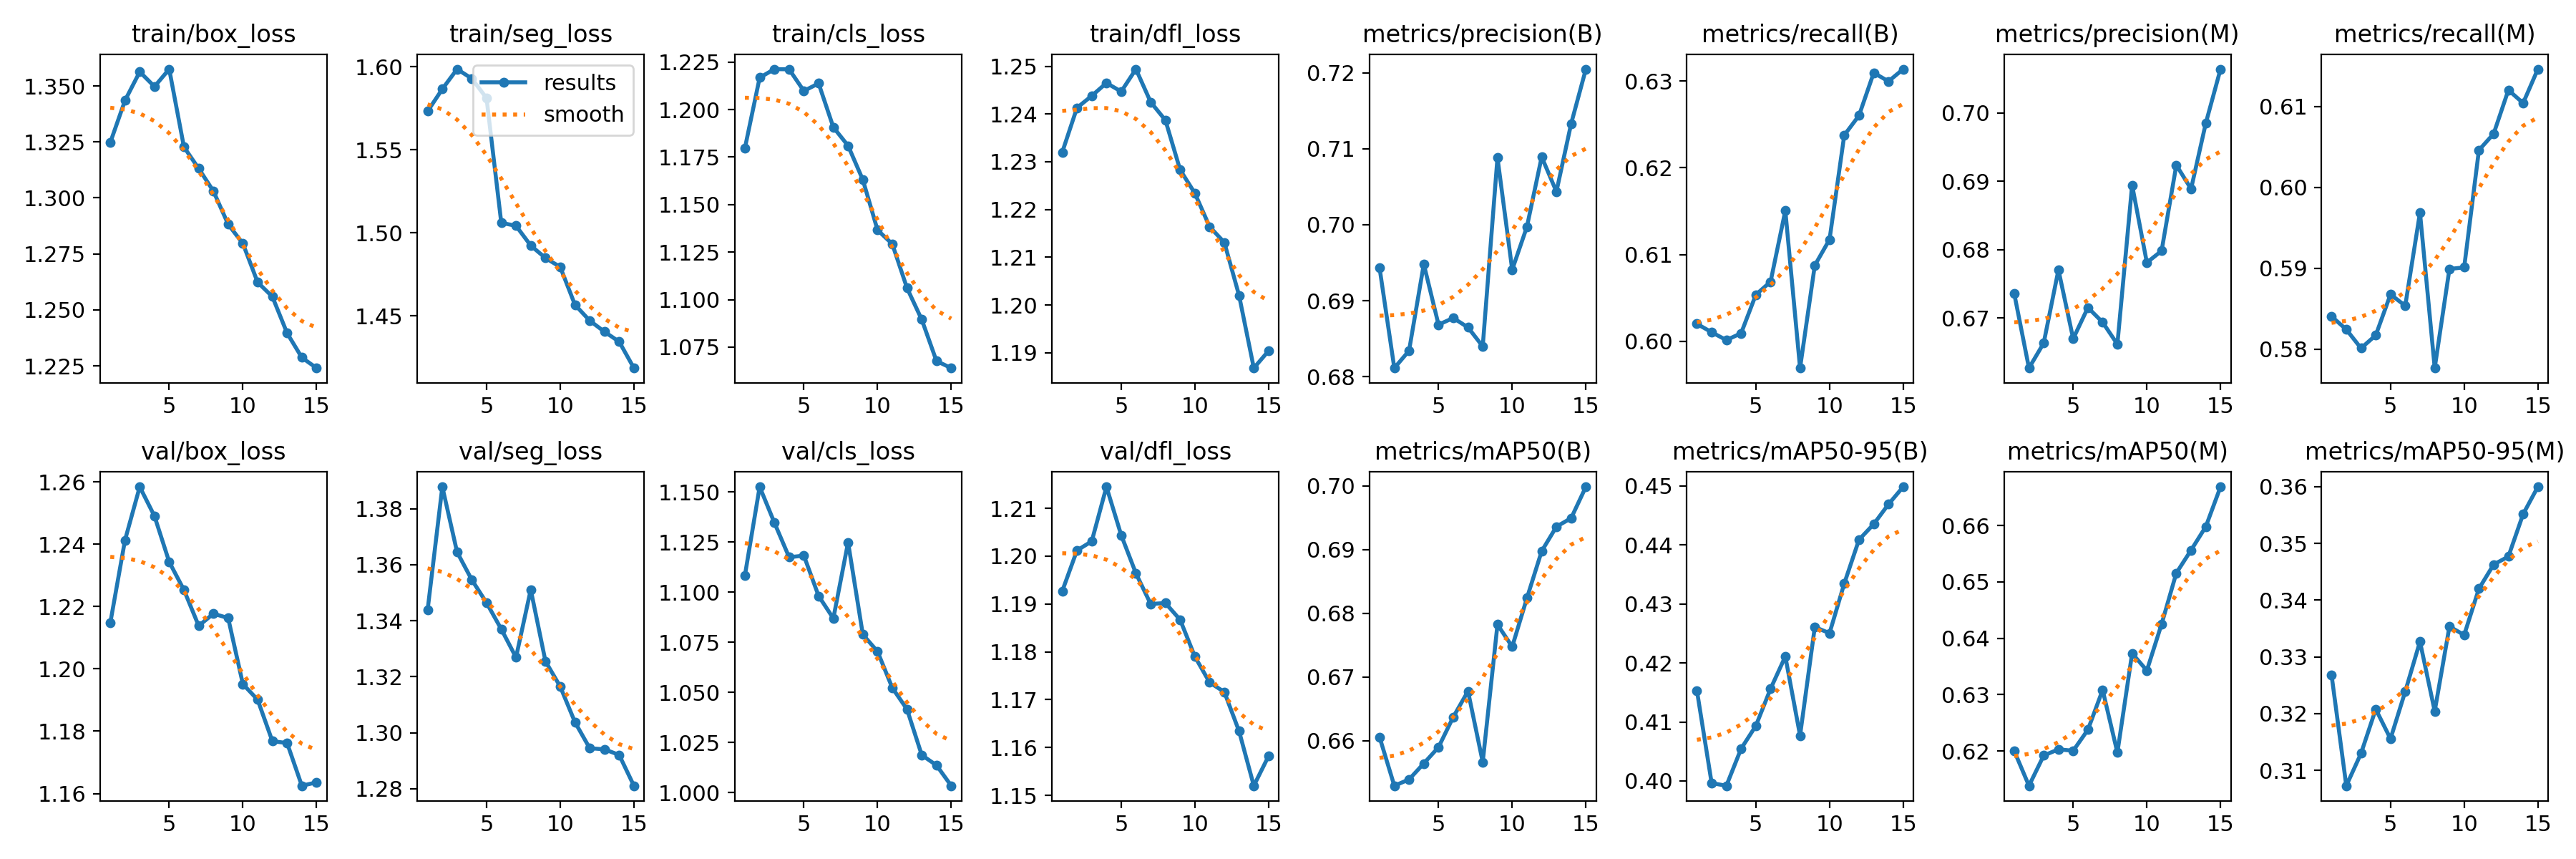

In [ ]:
Image("/content/data/15_epochs-/results.png")

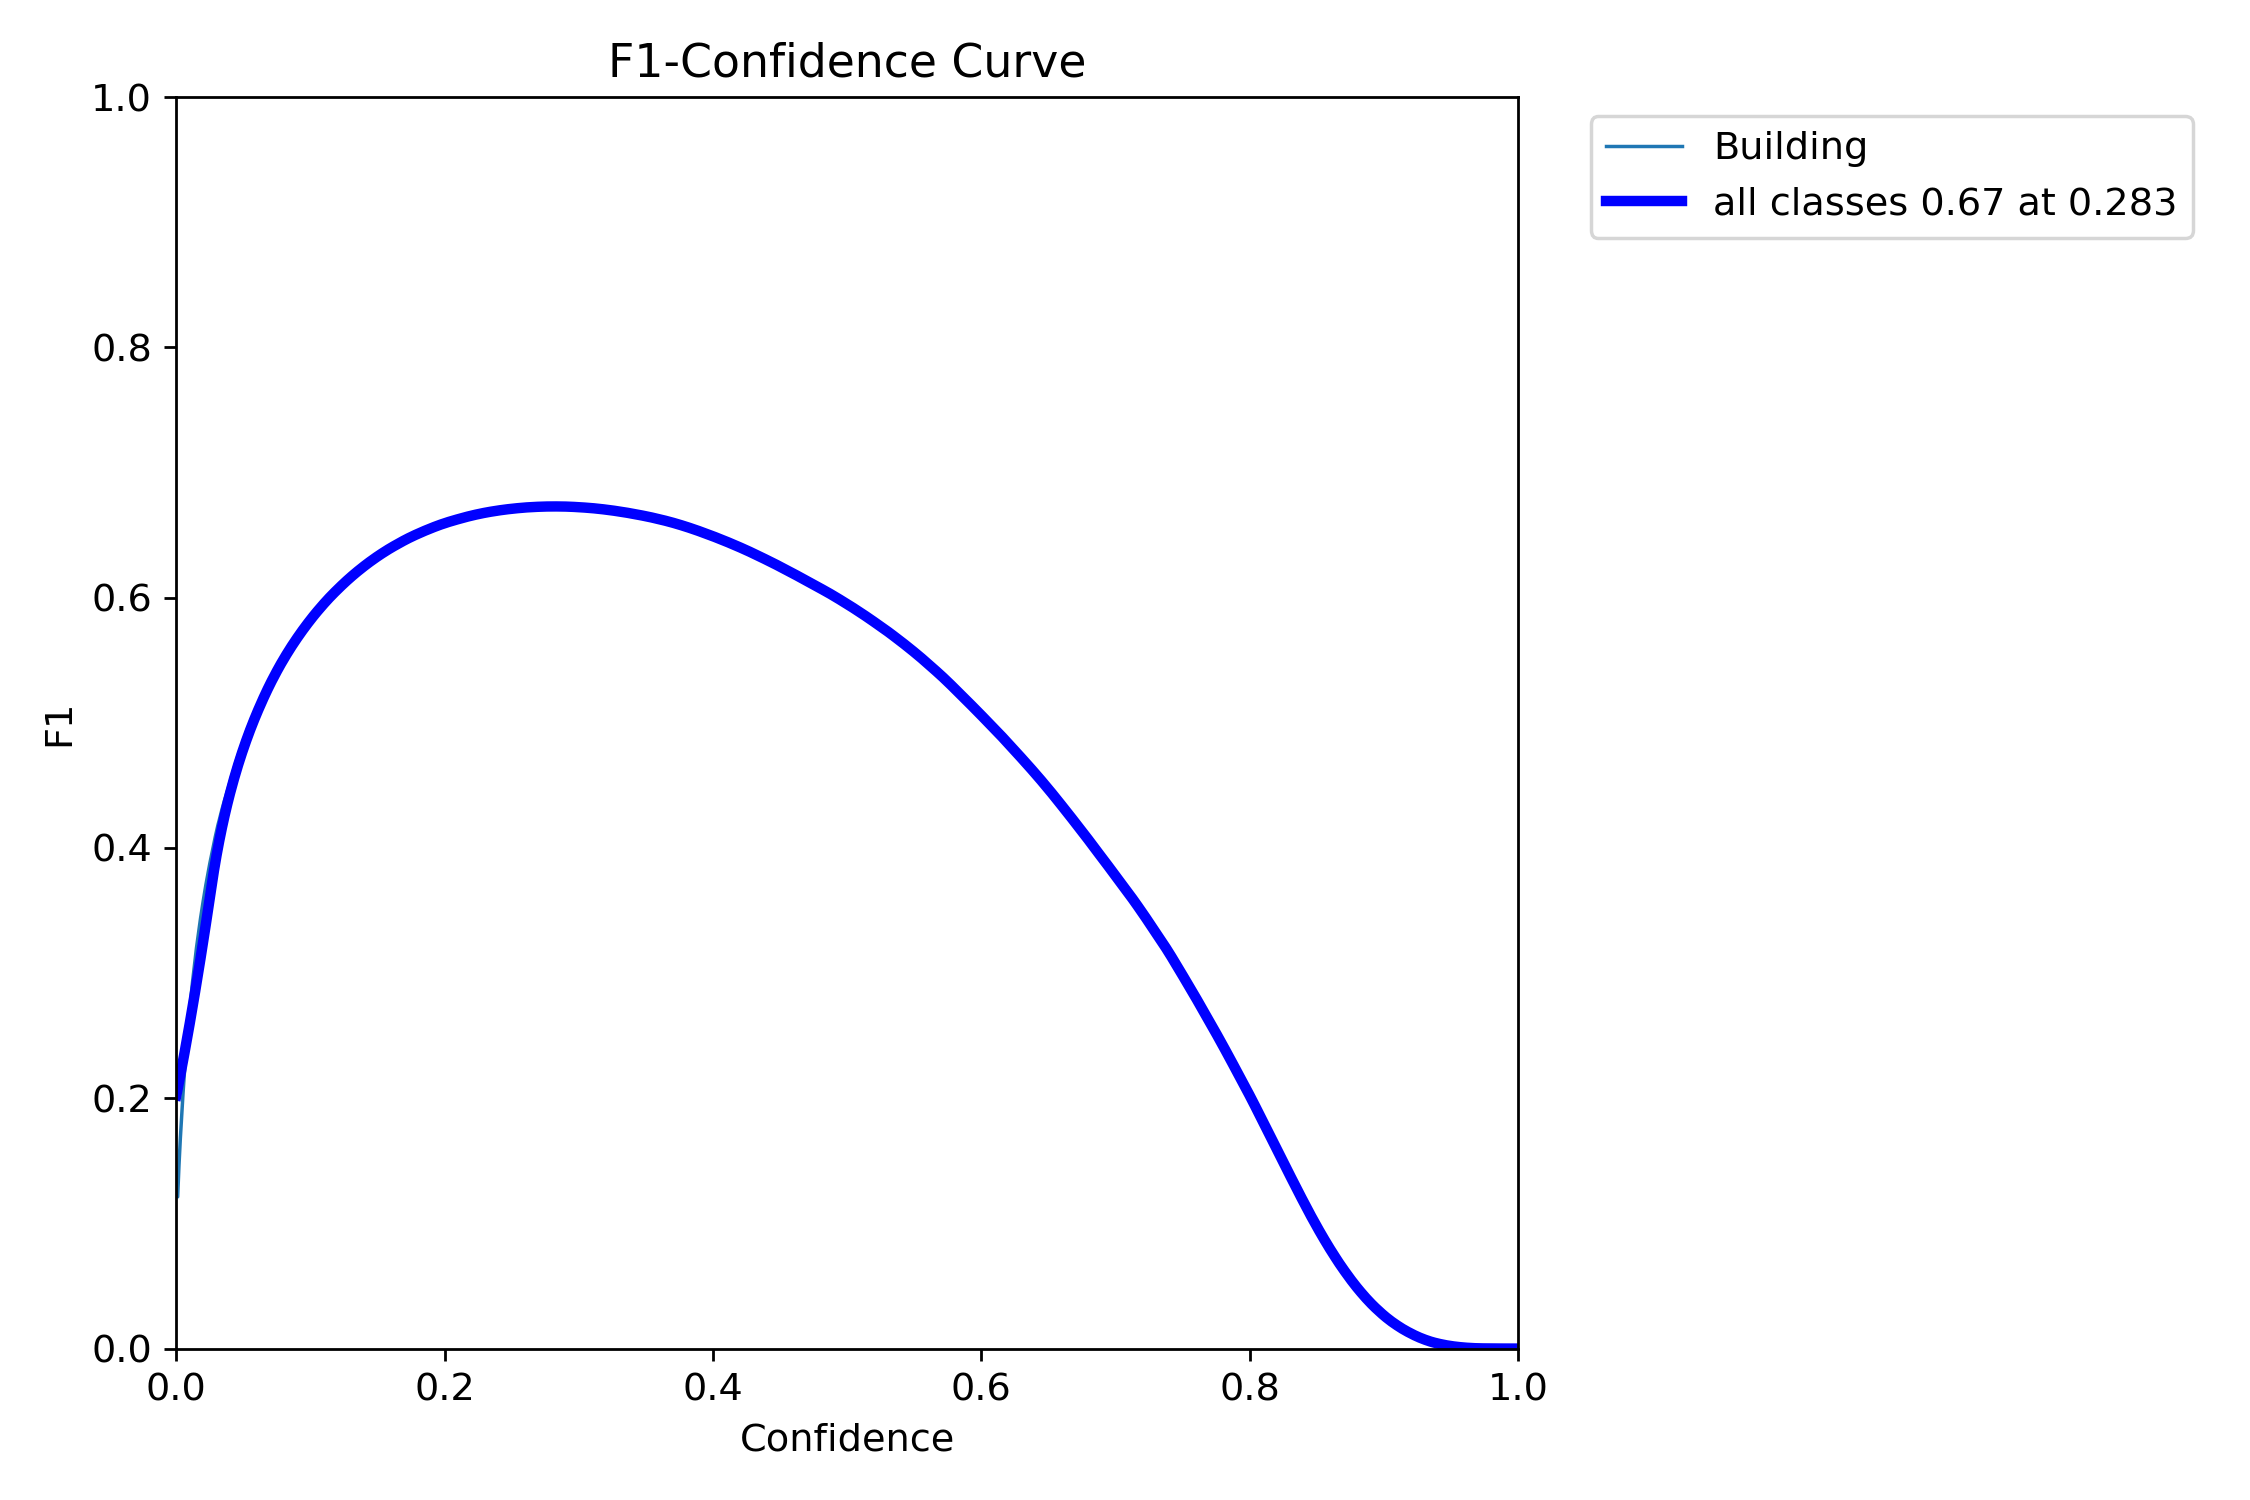

In [ ]:
Image("/content/data/15_epochs-/BoxF1_curve.png")

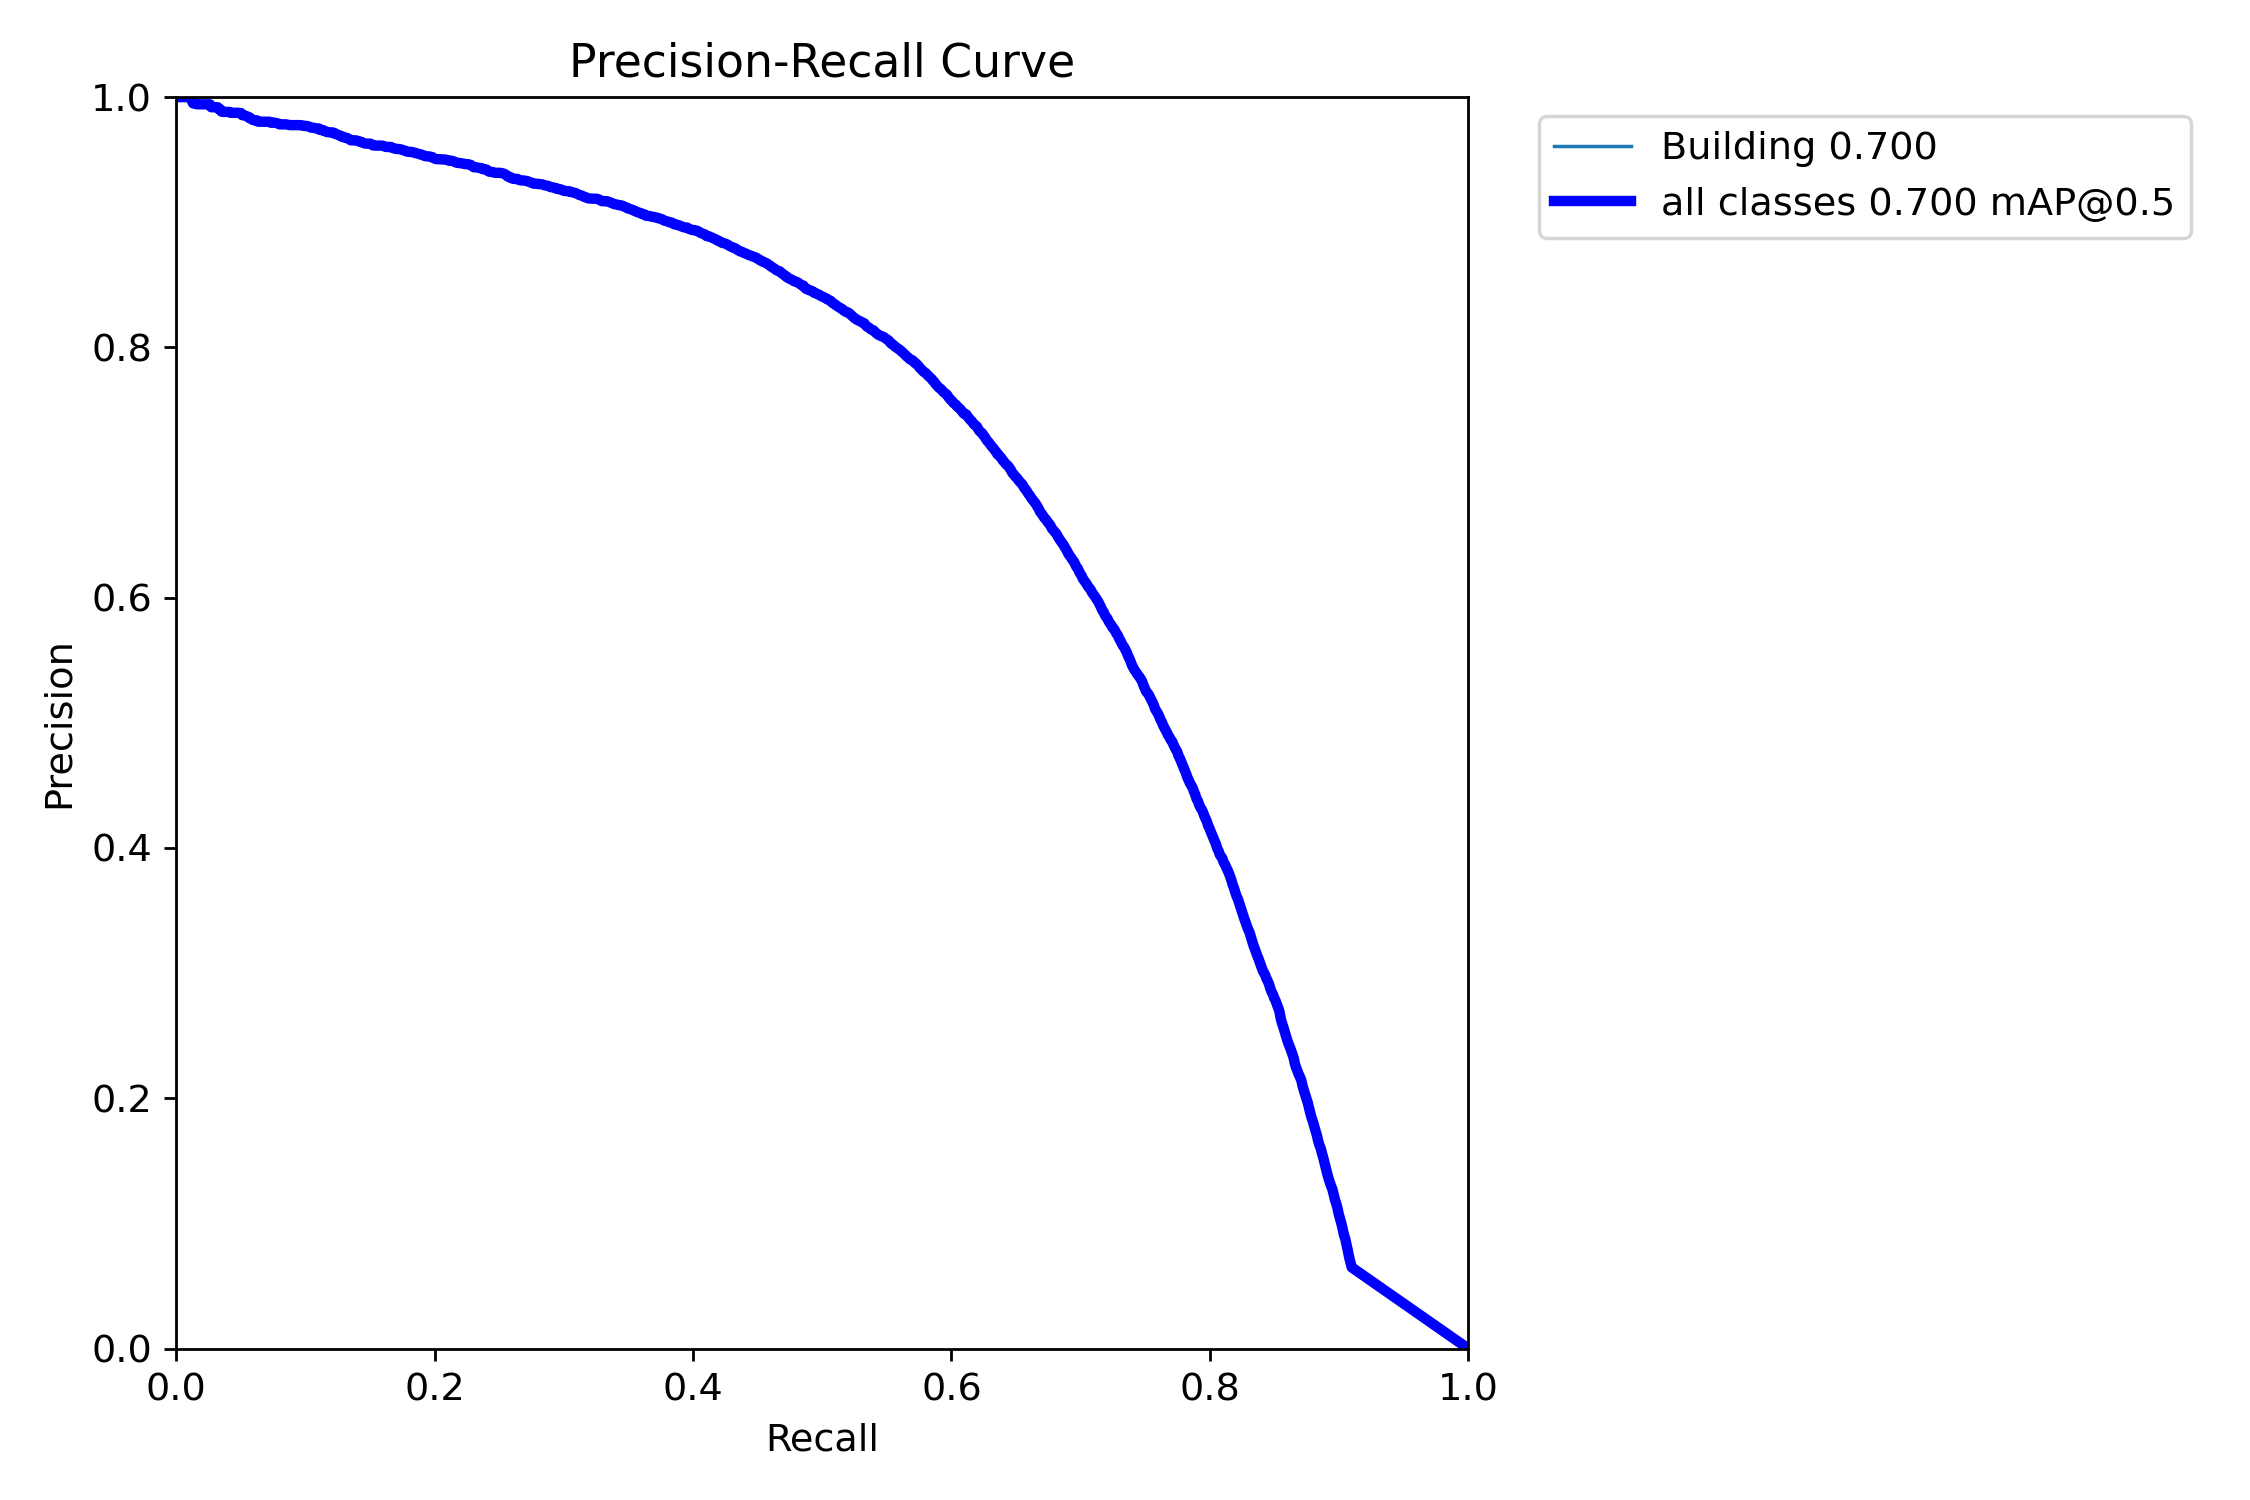

In [ ]:
Image("/content/data/15_epochs-/BoxPR_curve.png")

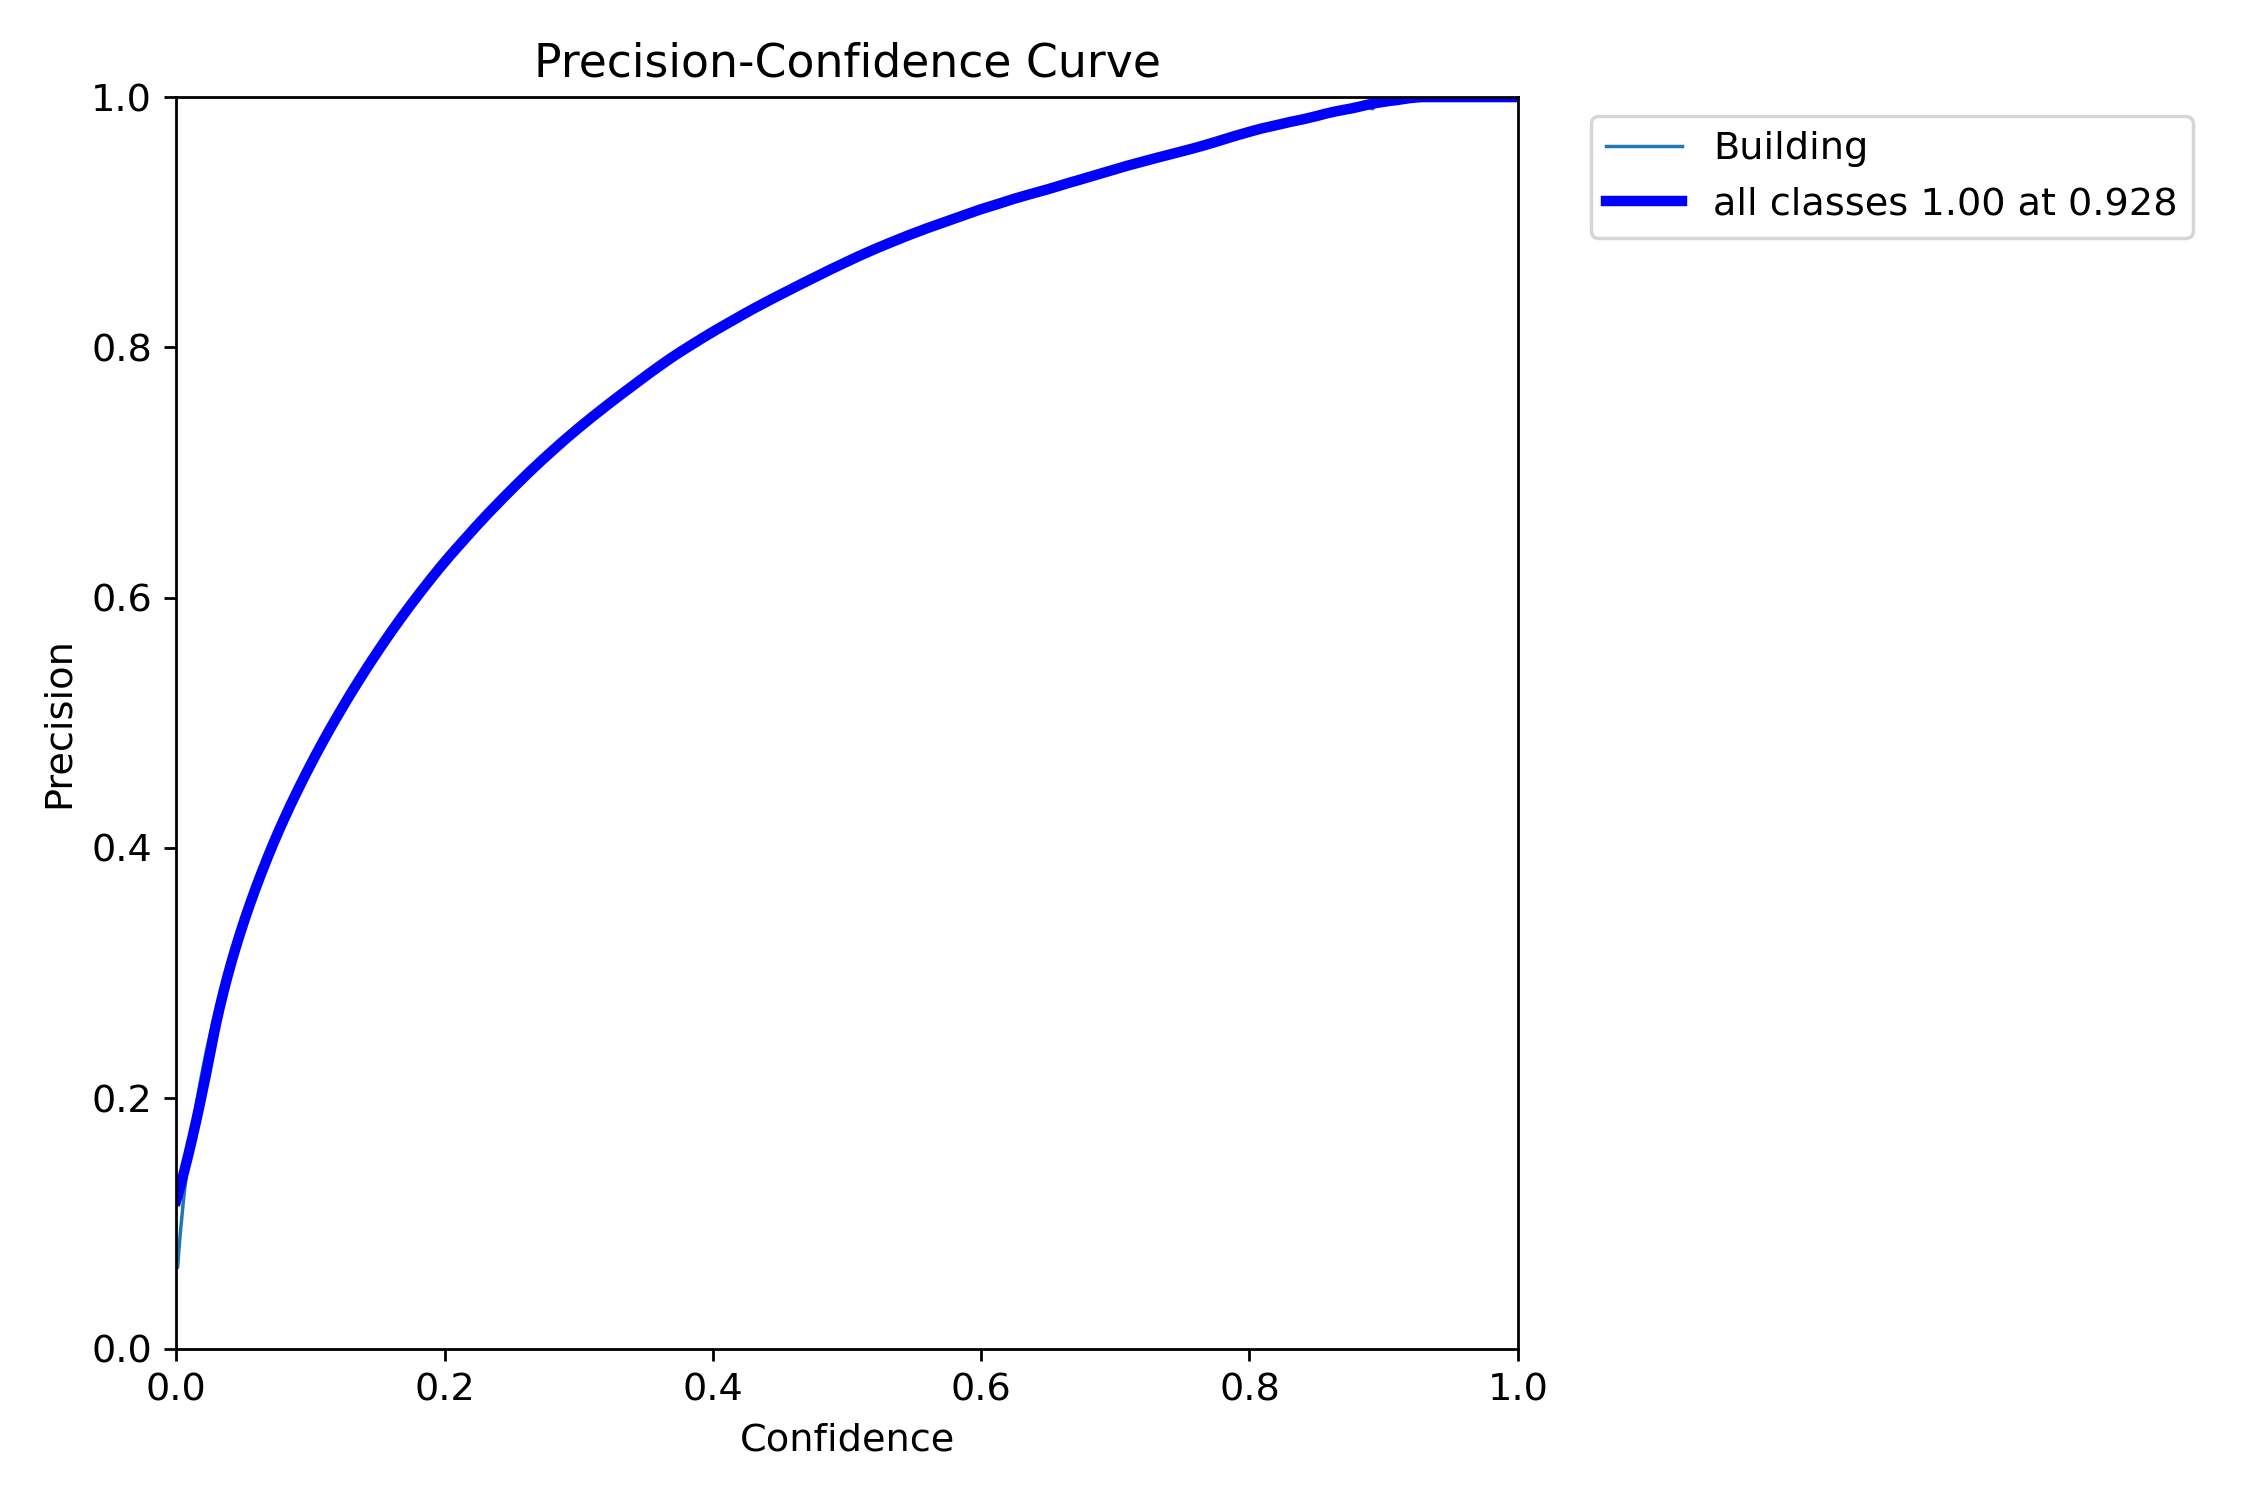

In [ ]:
Image("/content/data/15_epochs-/BoxP_curve.png")

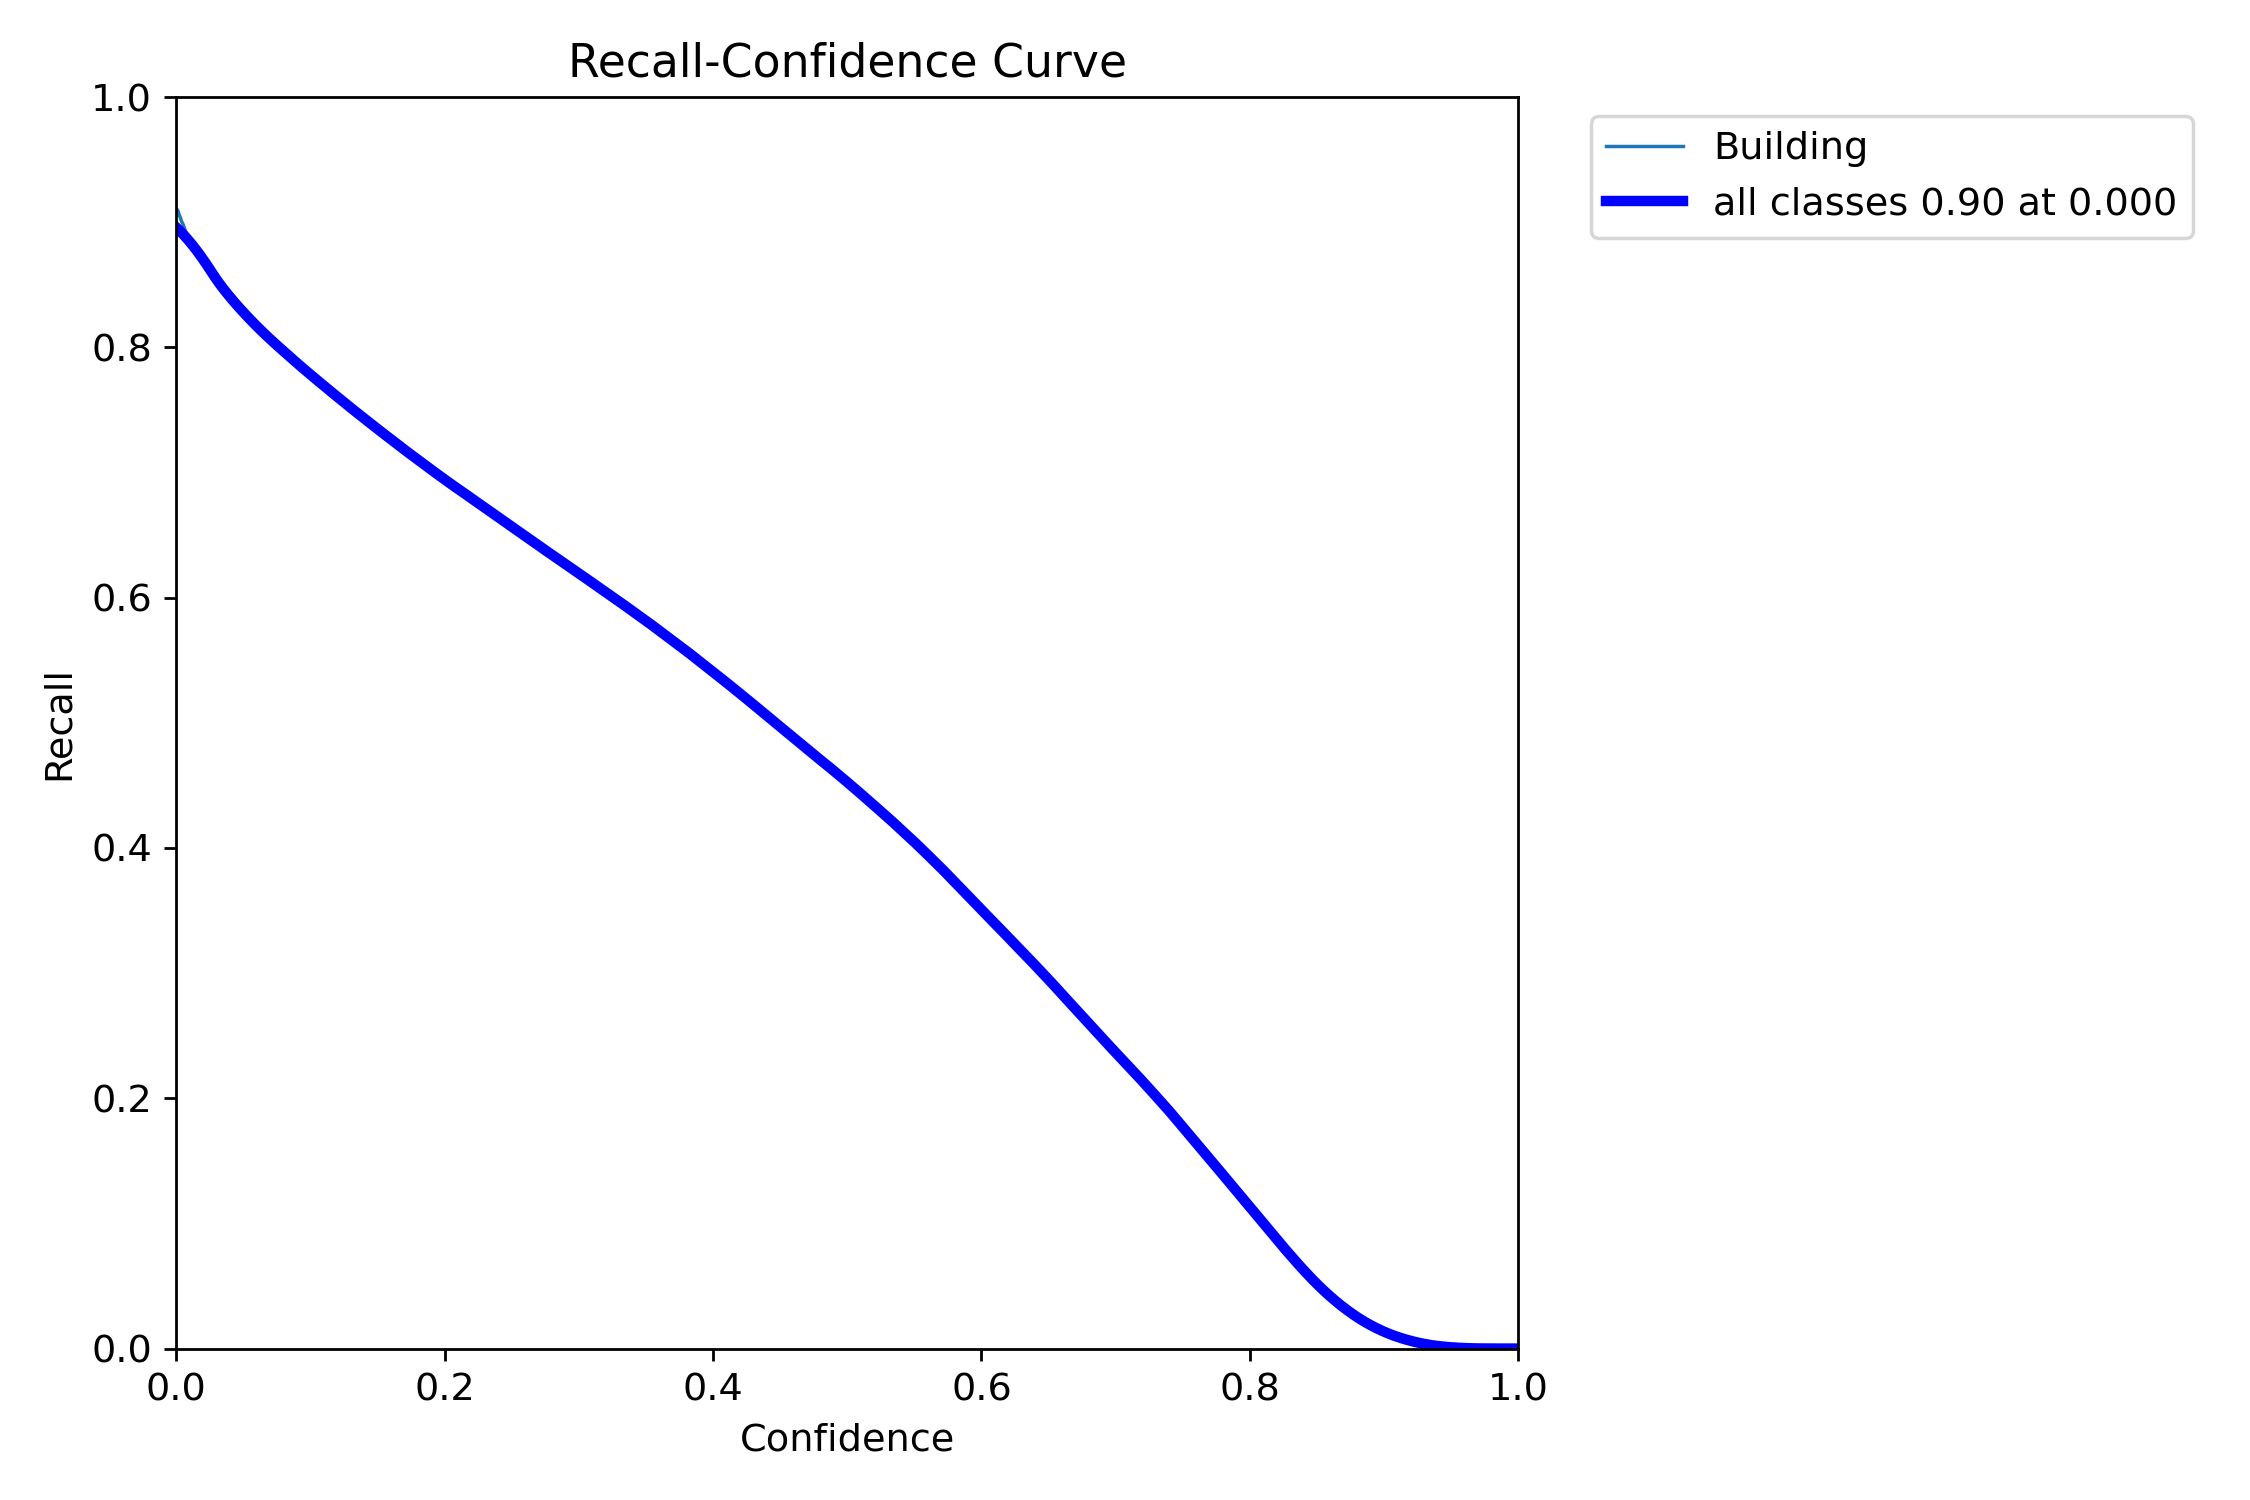

In [ ]:
Image("/content/data/15_epochs-/BoxR_curve.png")

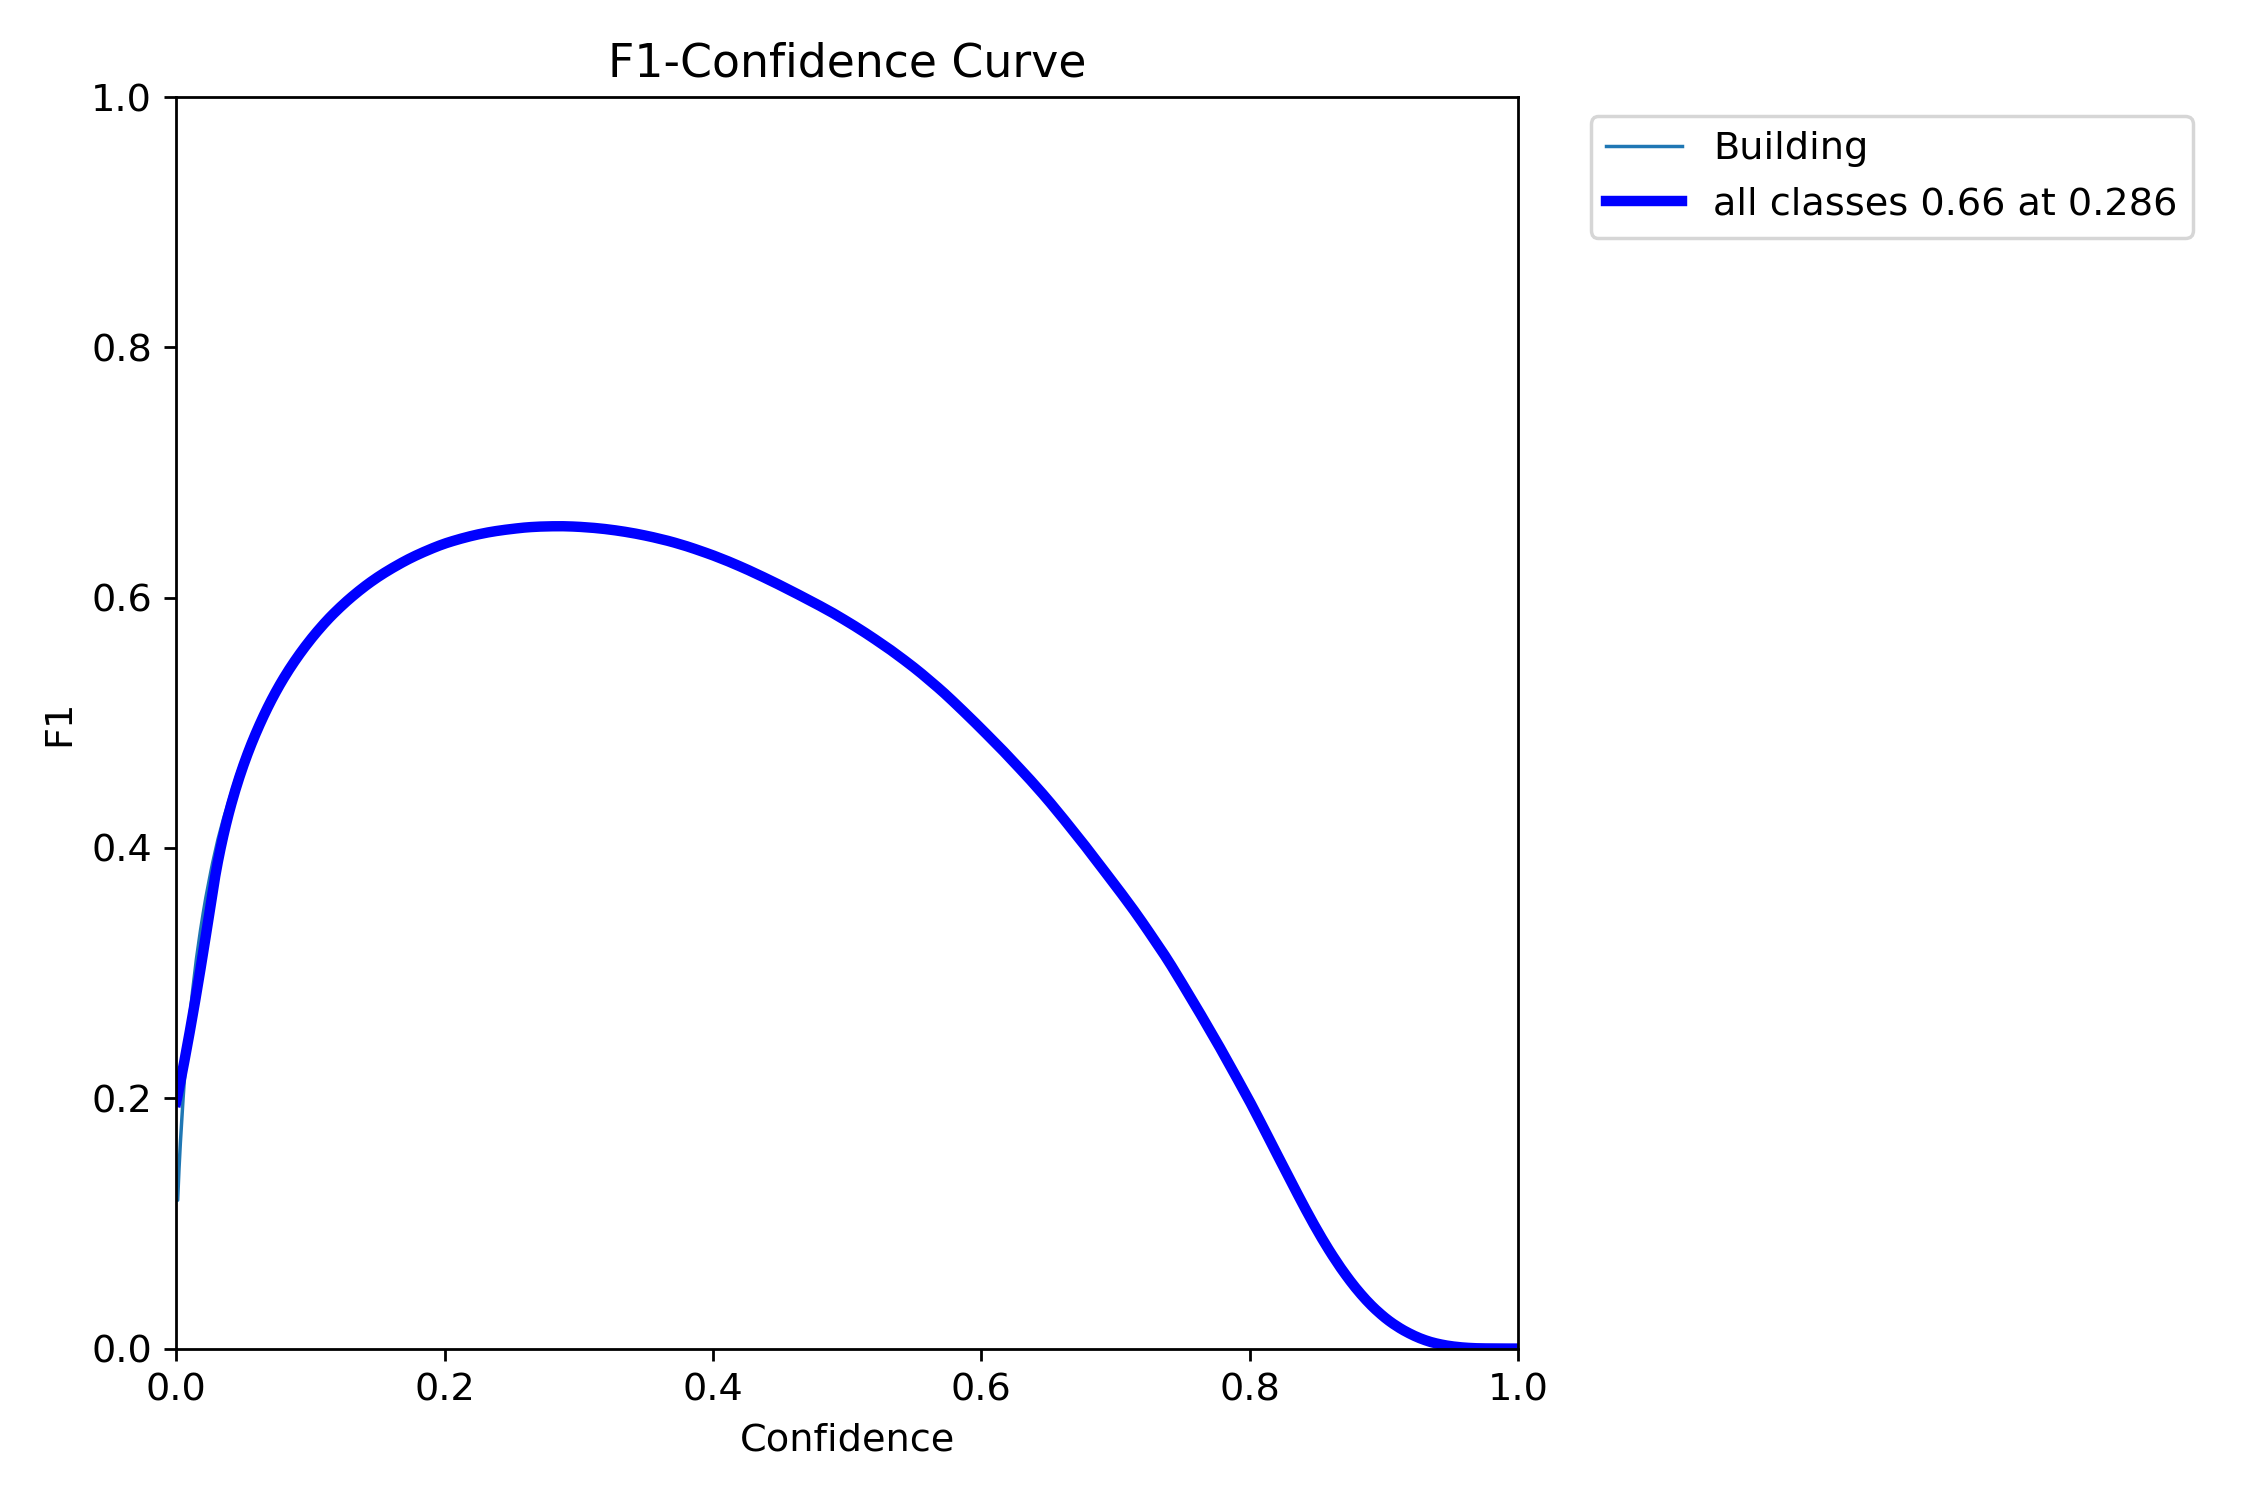

In [ ]:
Image("/content/data/15_epochs-/MaskF1_curve.png")

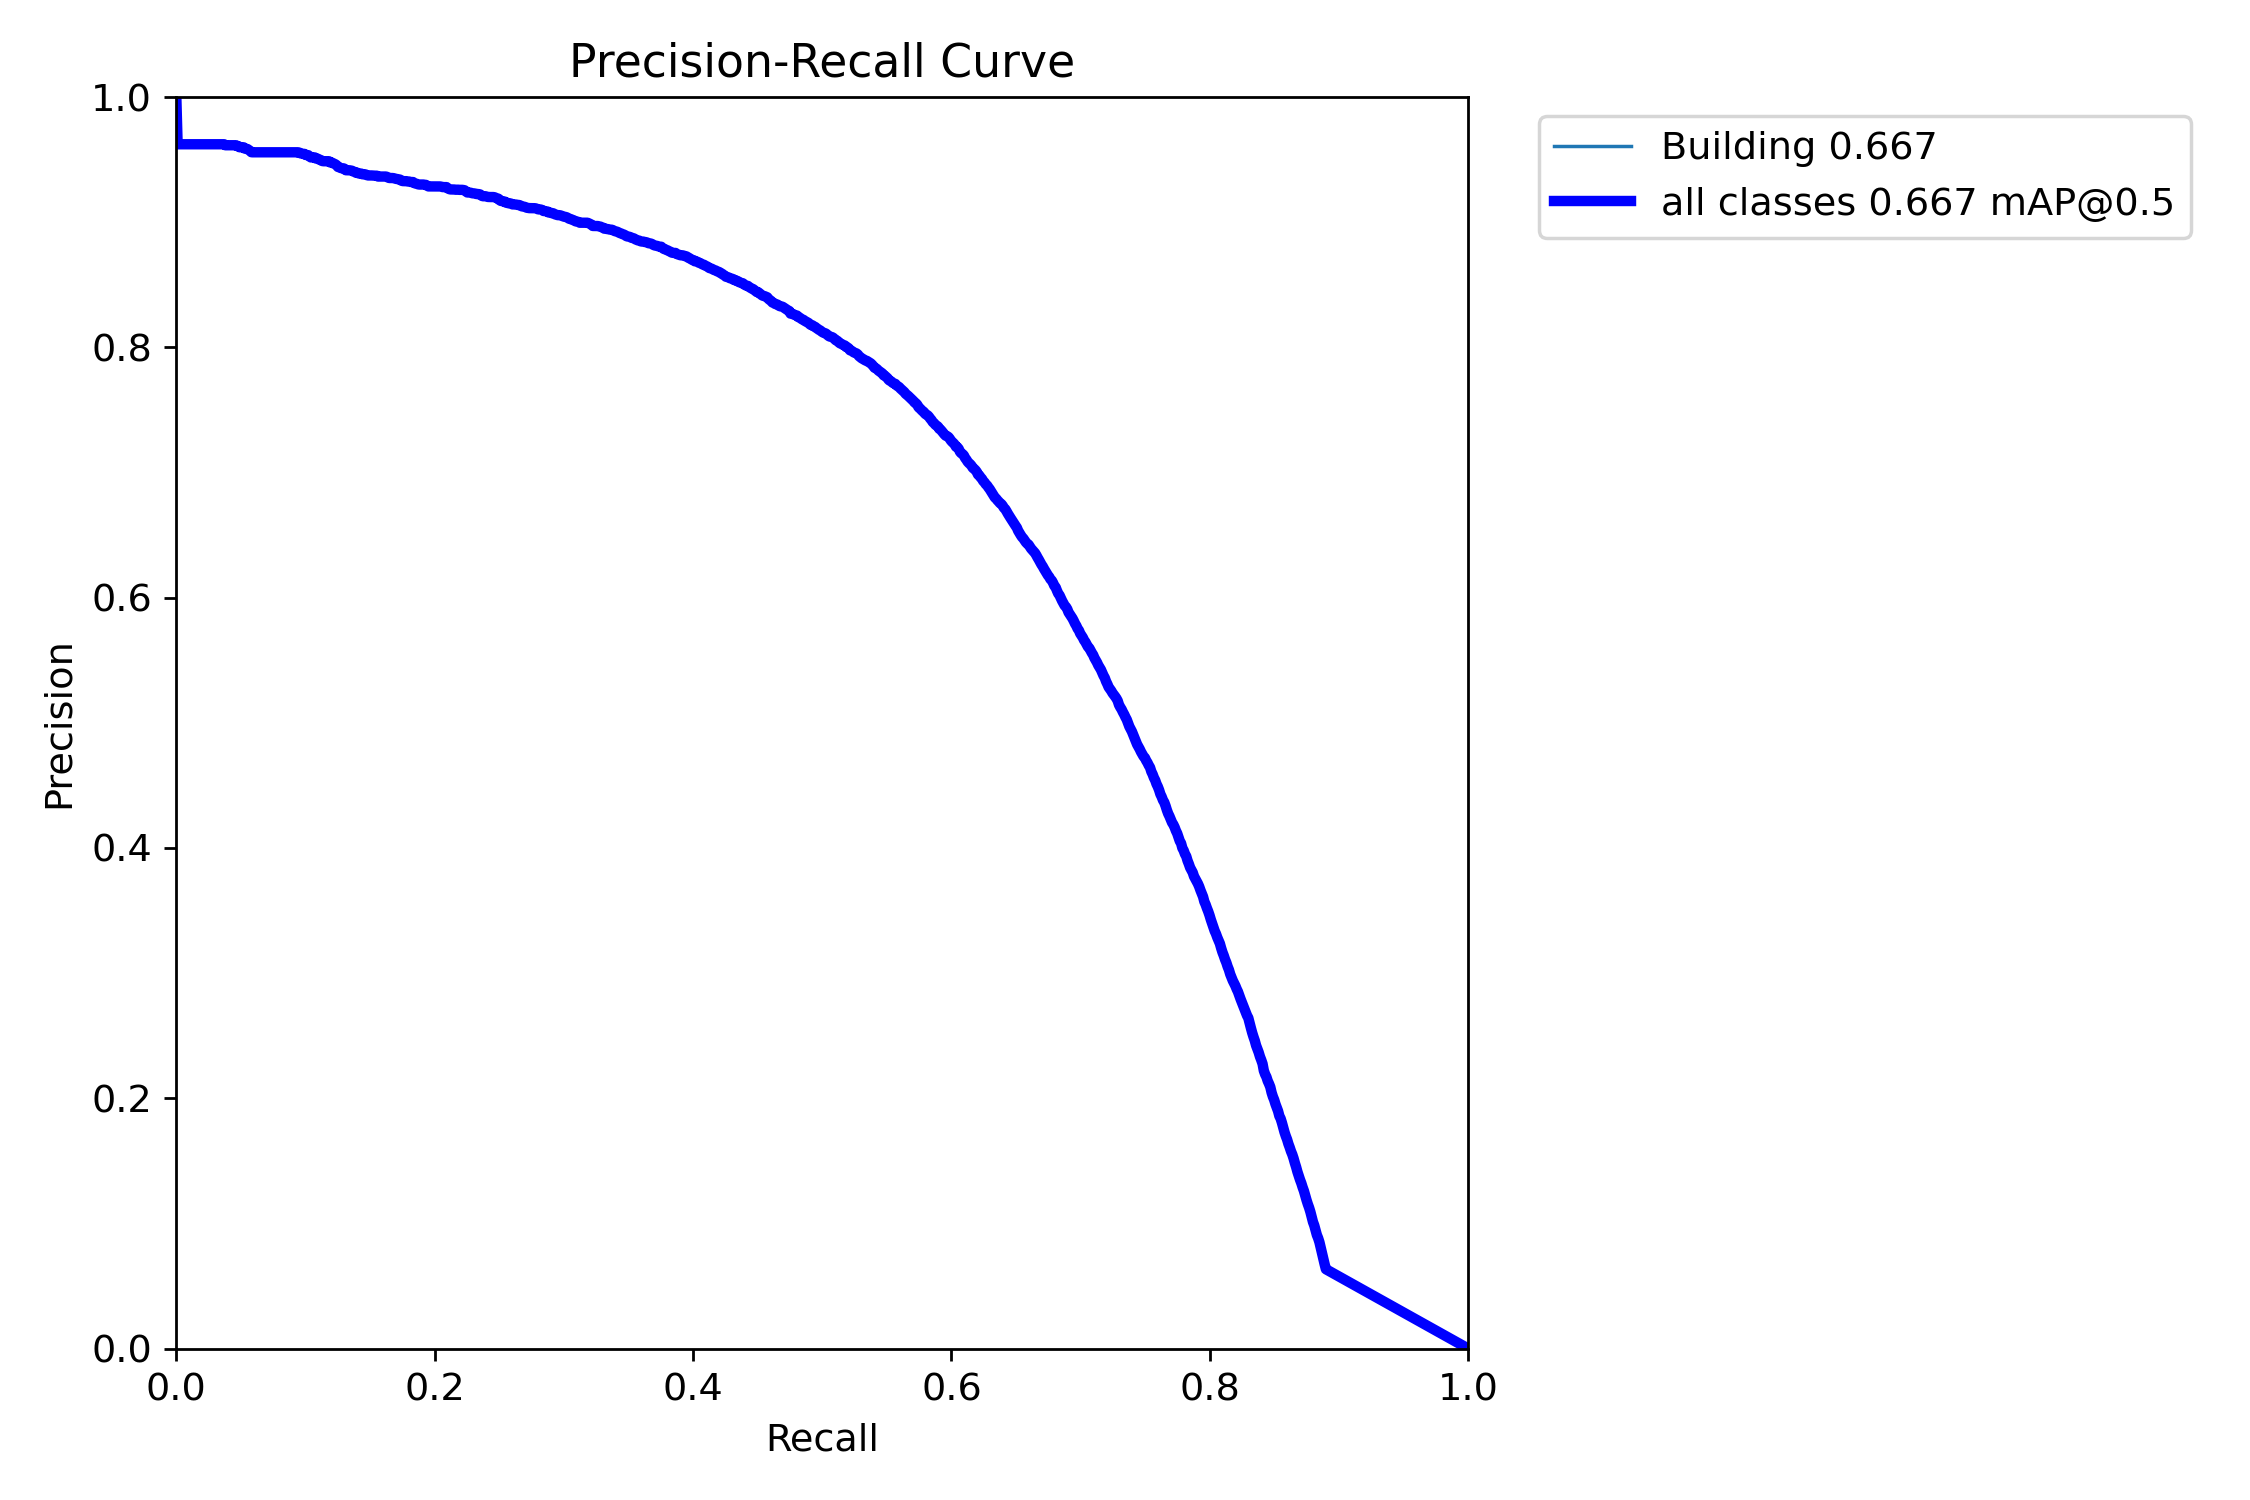

In [ ]:
Image("/content/data/15_epochs-/MaskPR_curve.png")

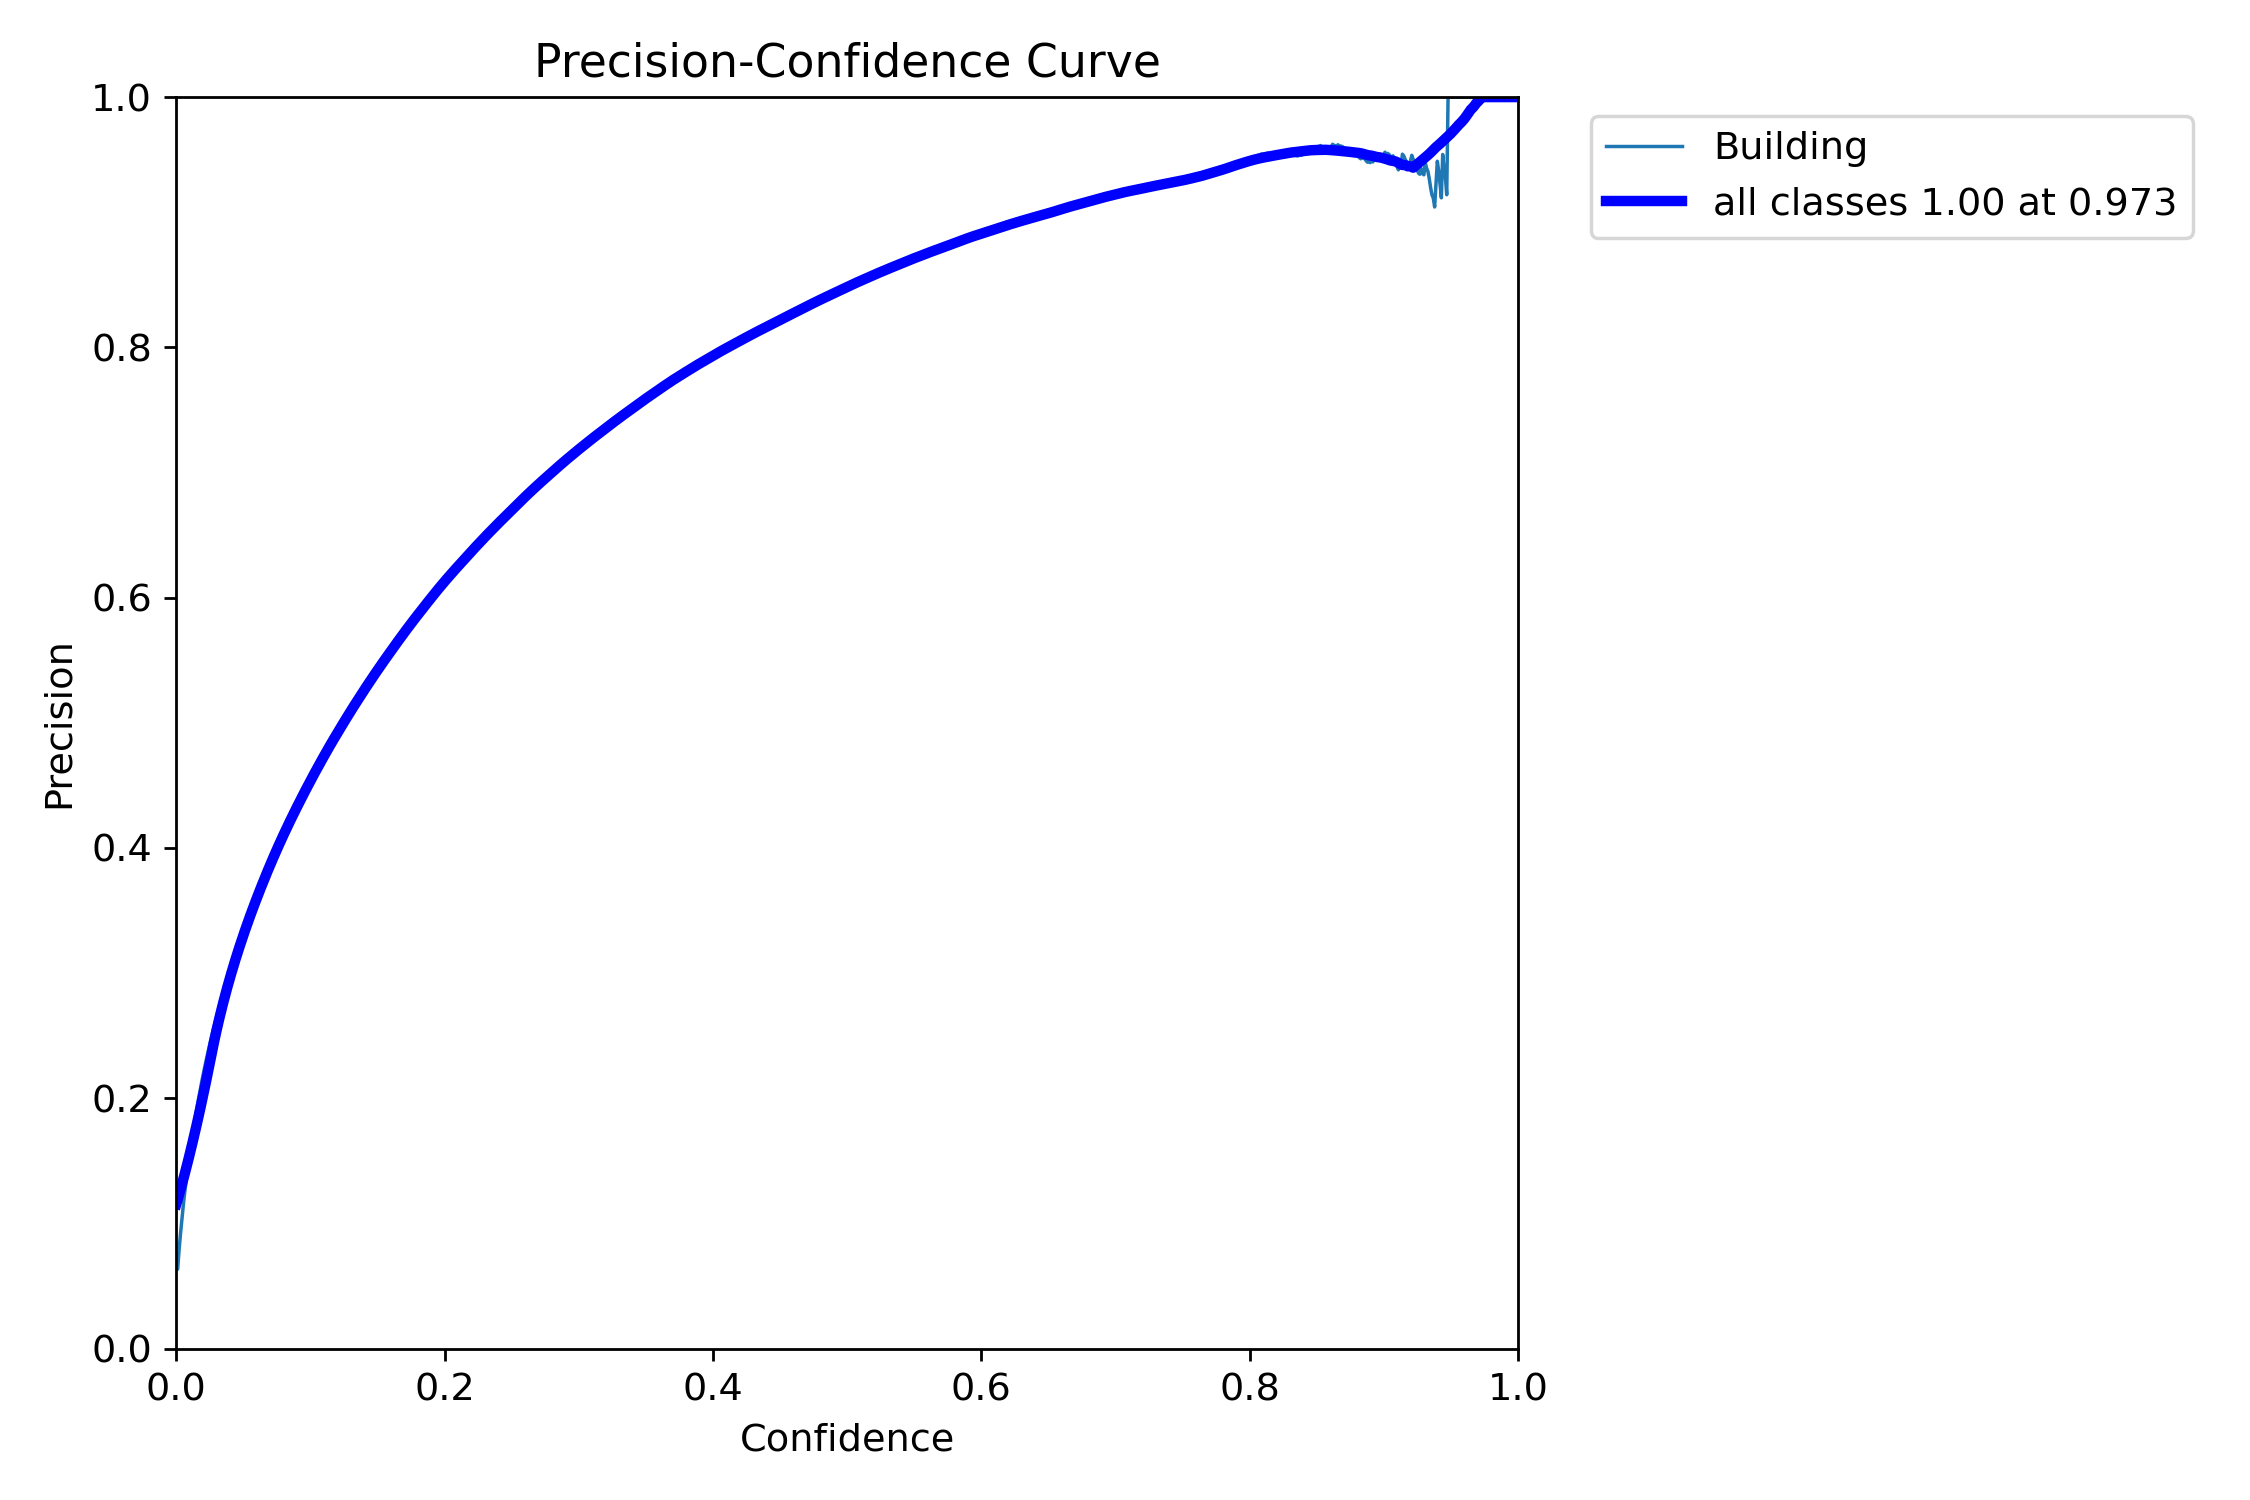

In [ ]:
Image("/content/data/15_epochs-/MaskP_curve.png")

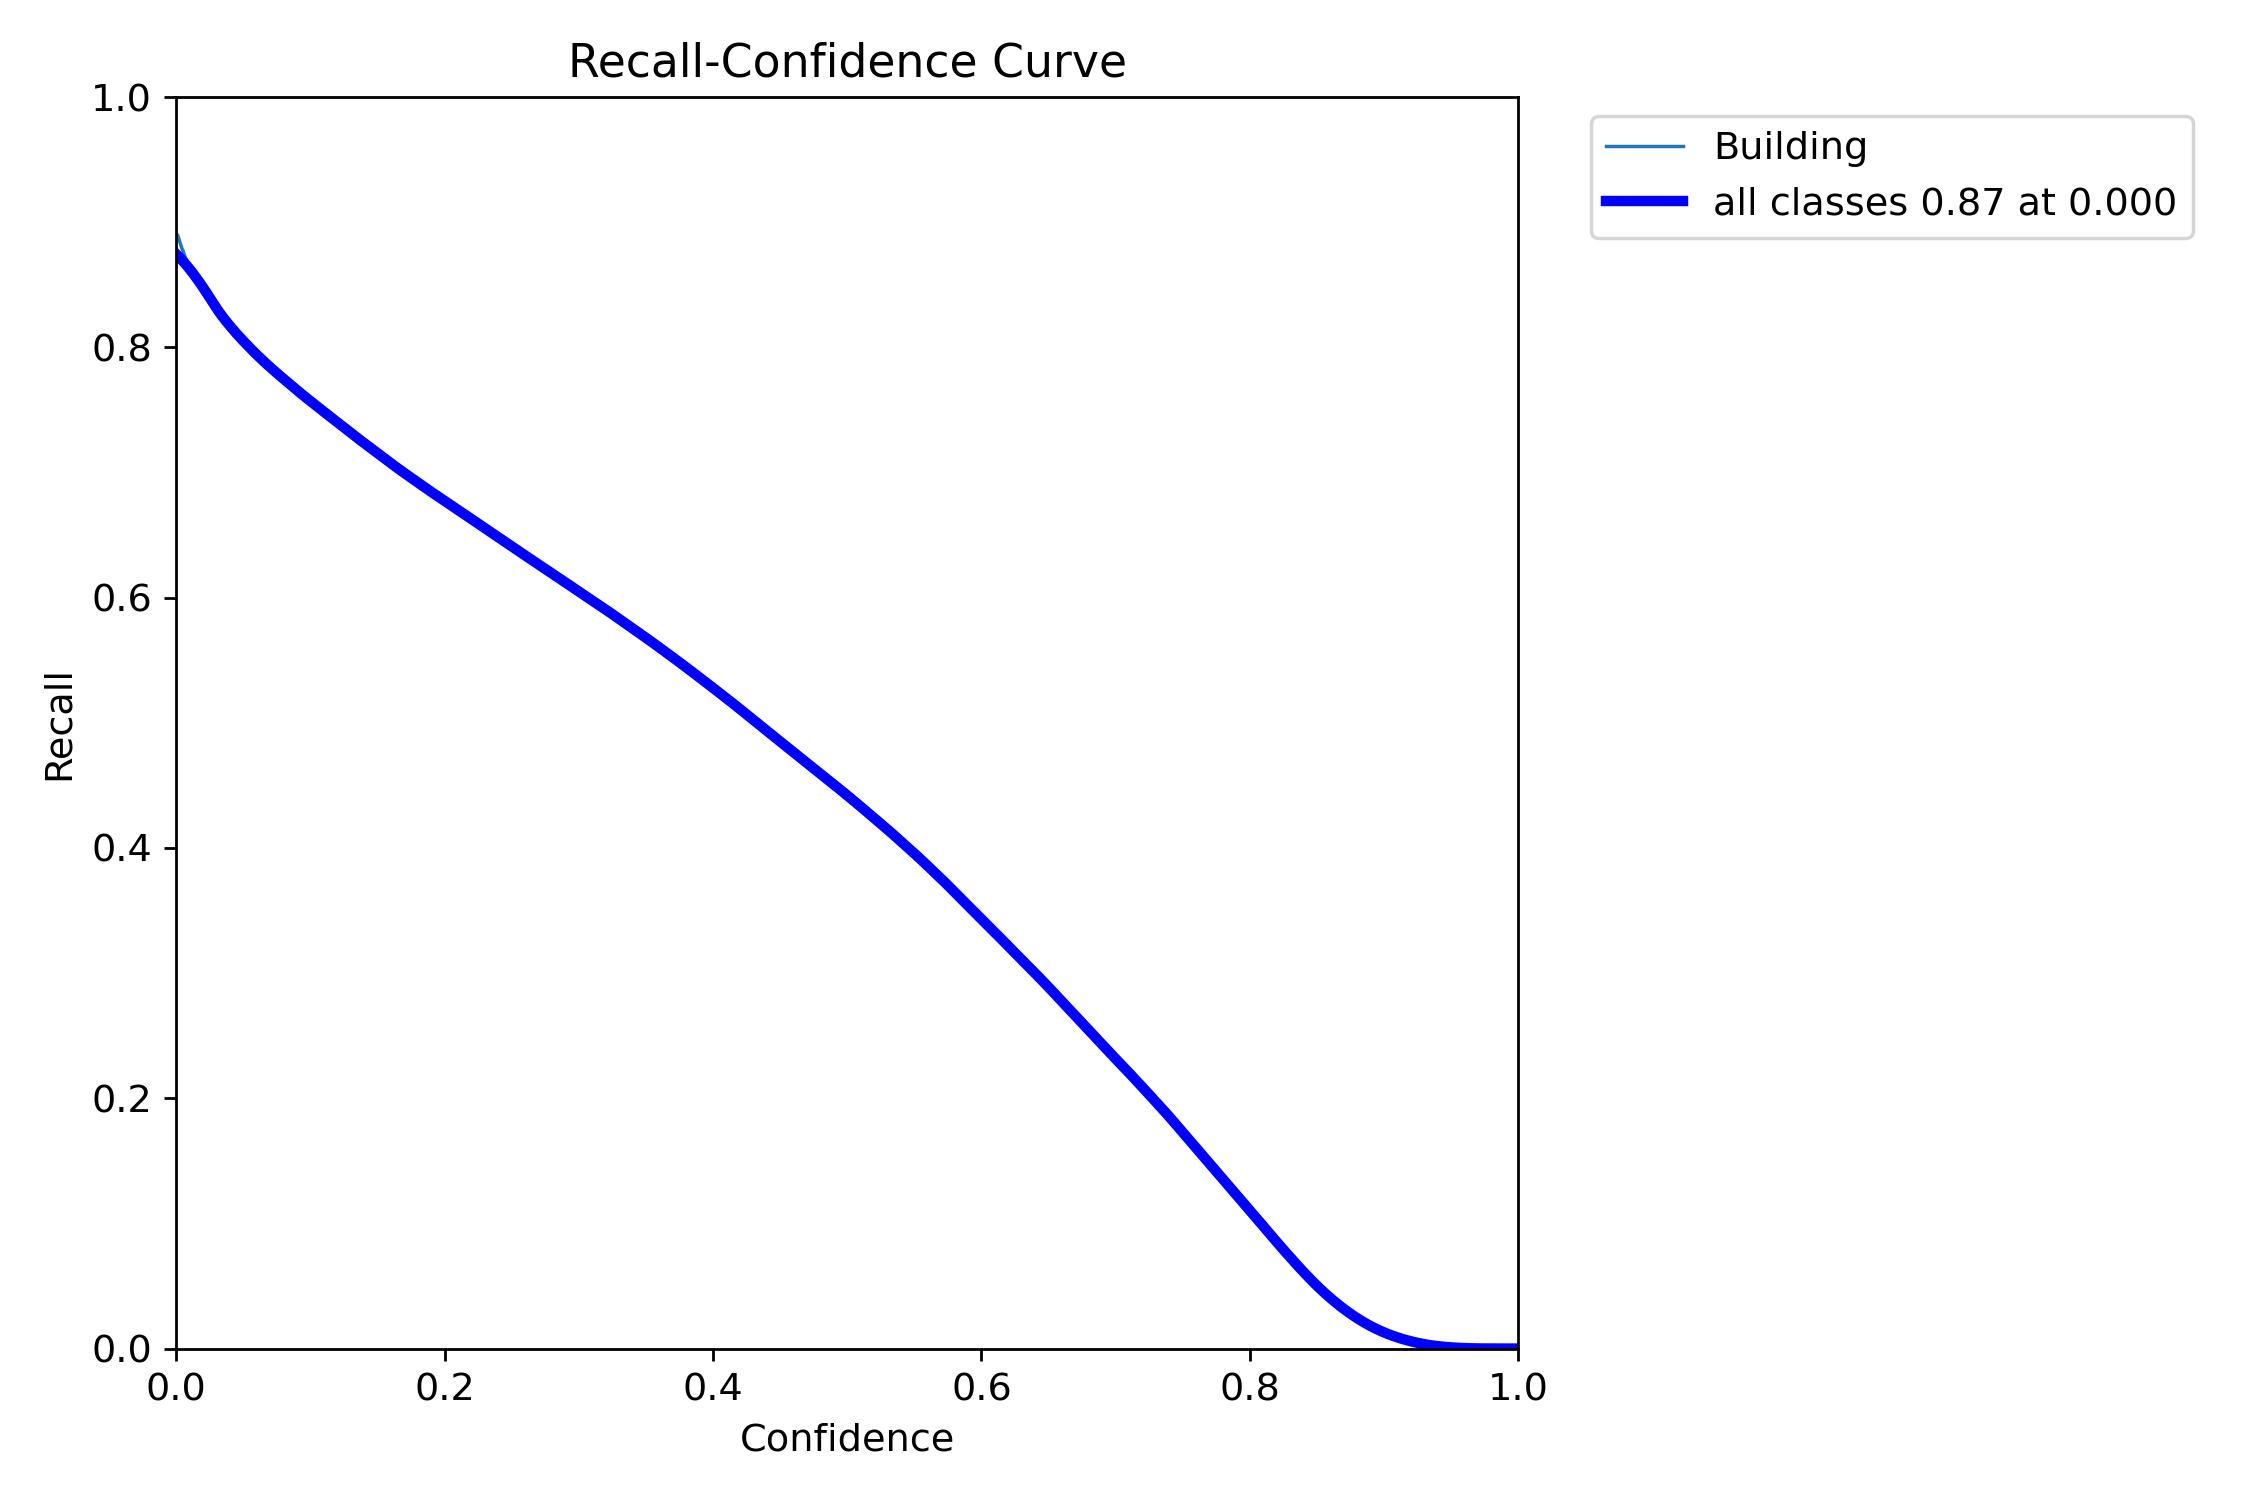

In [ ]:
Image("/content/data/15_epochs-/MaskR_curve.png")

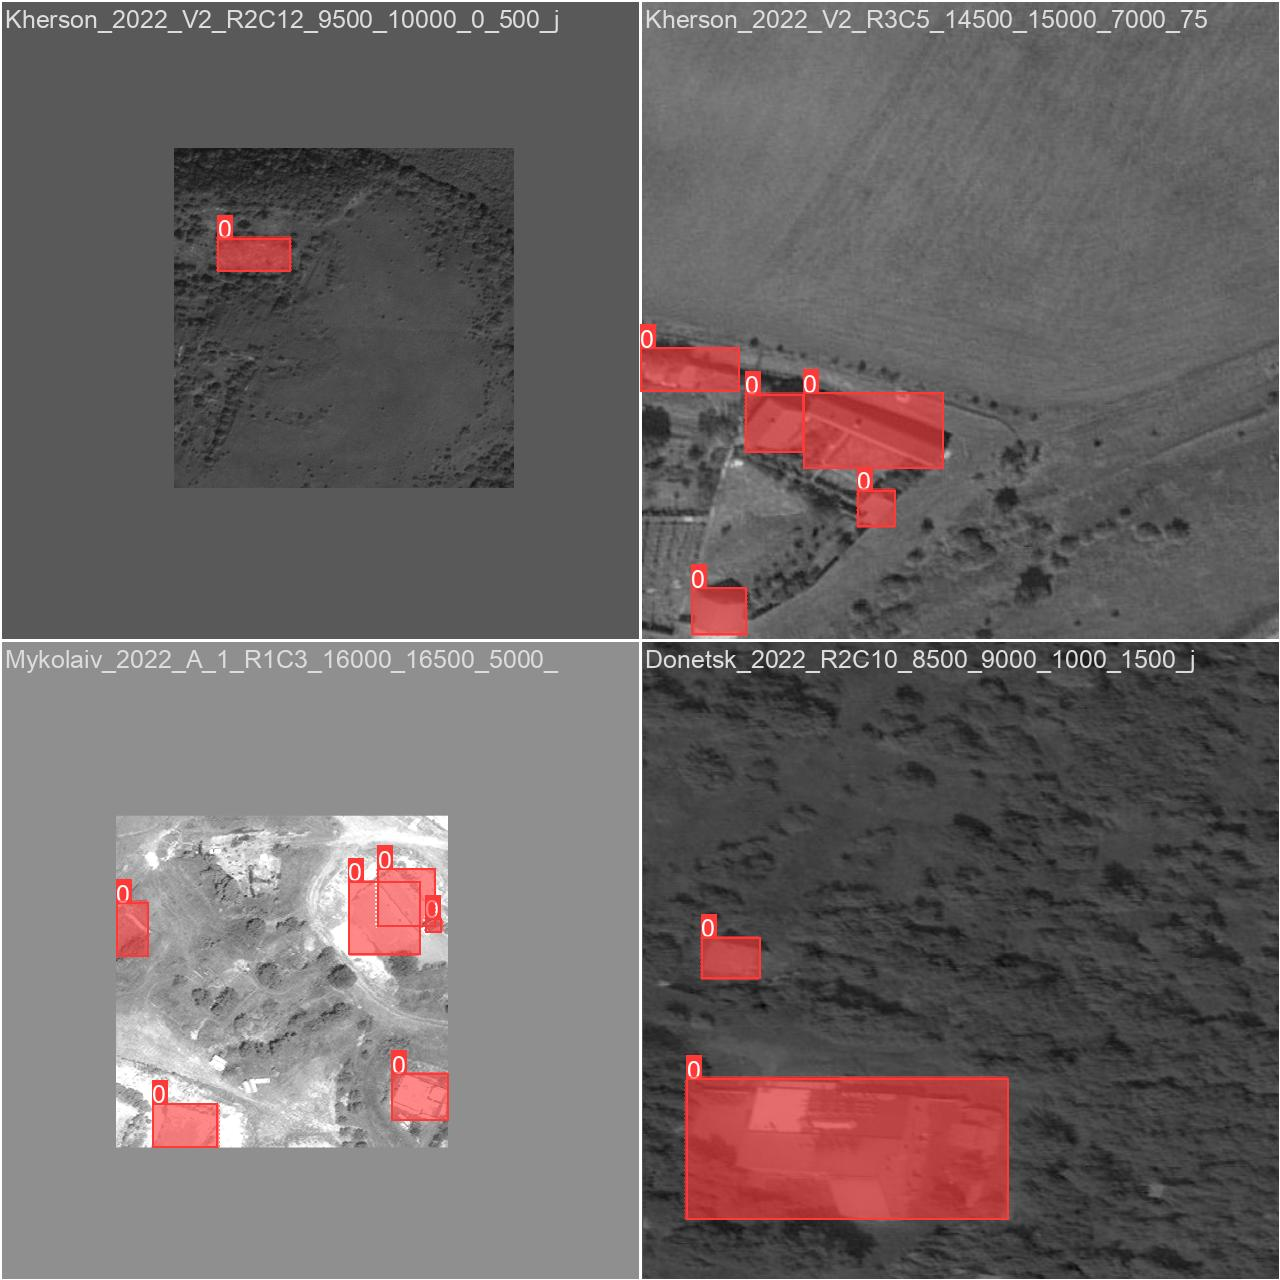

In [ ]:
Image(filename='/content/data/15_epochs-/train_batch7415.jpg')

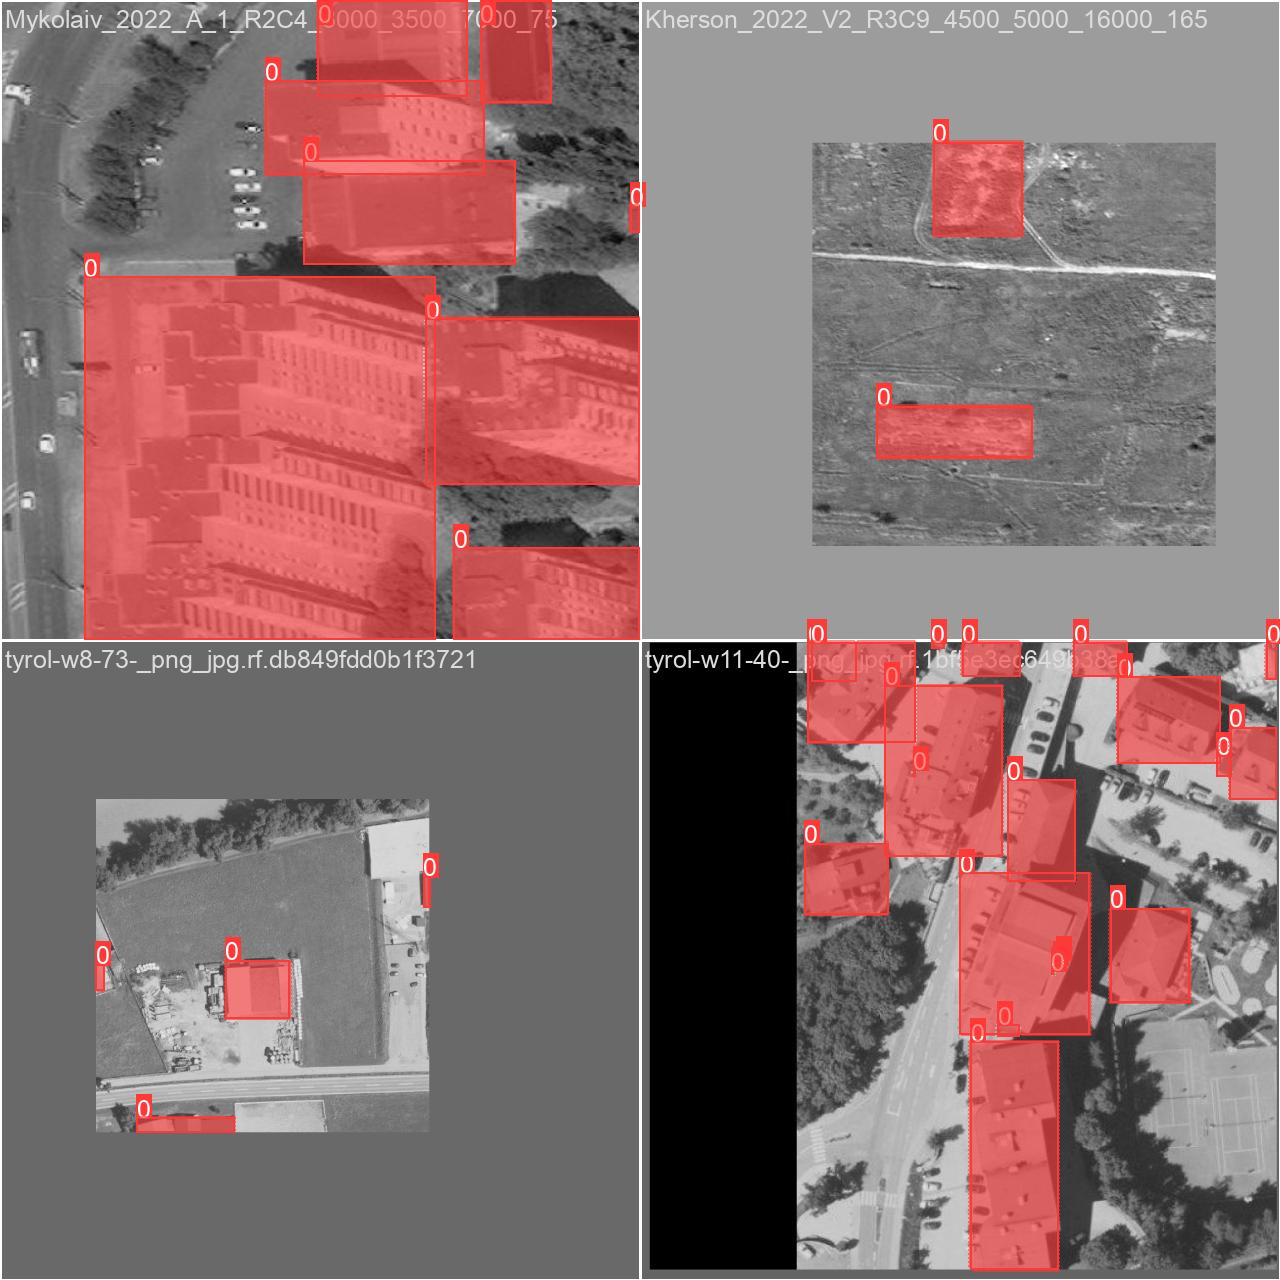

In [ ]:
Image(filename='/content/data/15_epochs-/train_batch7417.jpg')

In [ ]:
trained_model_1 = YOLO('/content/data/15_epochs-/weights/best.pt')


In [35]:
test_image_1 = '/content/data/test/images/Donetsk_2022_R2C10_9000_9500_8500_9000_jpg.rf.3fbb01daedeac275b6e6286e82b8707d.jpg'
results_test_image_1 = trained_model_1.predict(test_image_1, conf=0.2)


image 1/1 /content/data/test/images/Donetsk_2022_R2C10_9000_9500_8500_9000_jpg.rf.3fbb01daedeac275b6e6286e82b8707d.jpg: 640x640 15 Buildings, 11.4ms
Speed: 1.8ms preprocess, 11.4ms inference, 5.9ms postprocess per image at shape (1, 3, 640, 640)


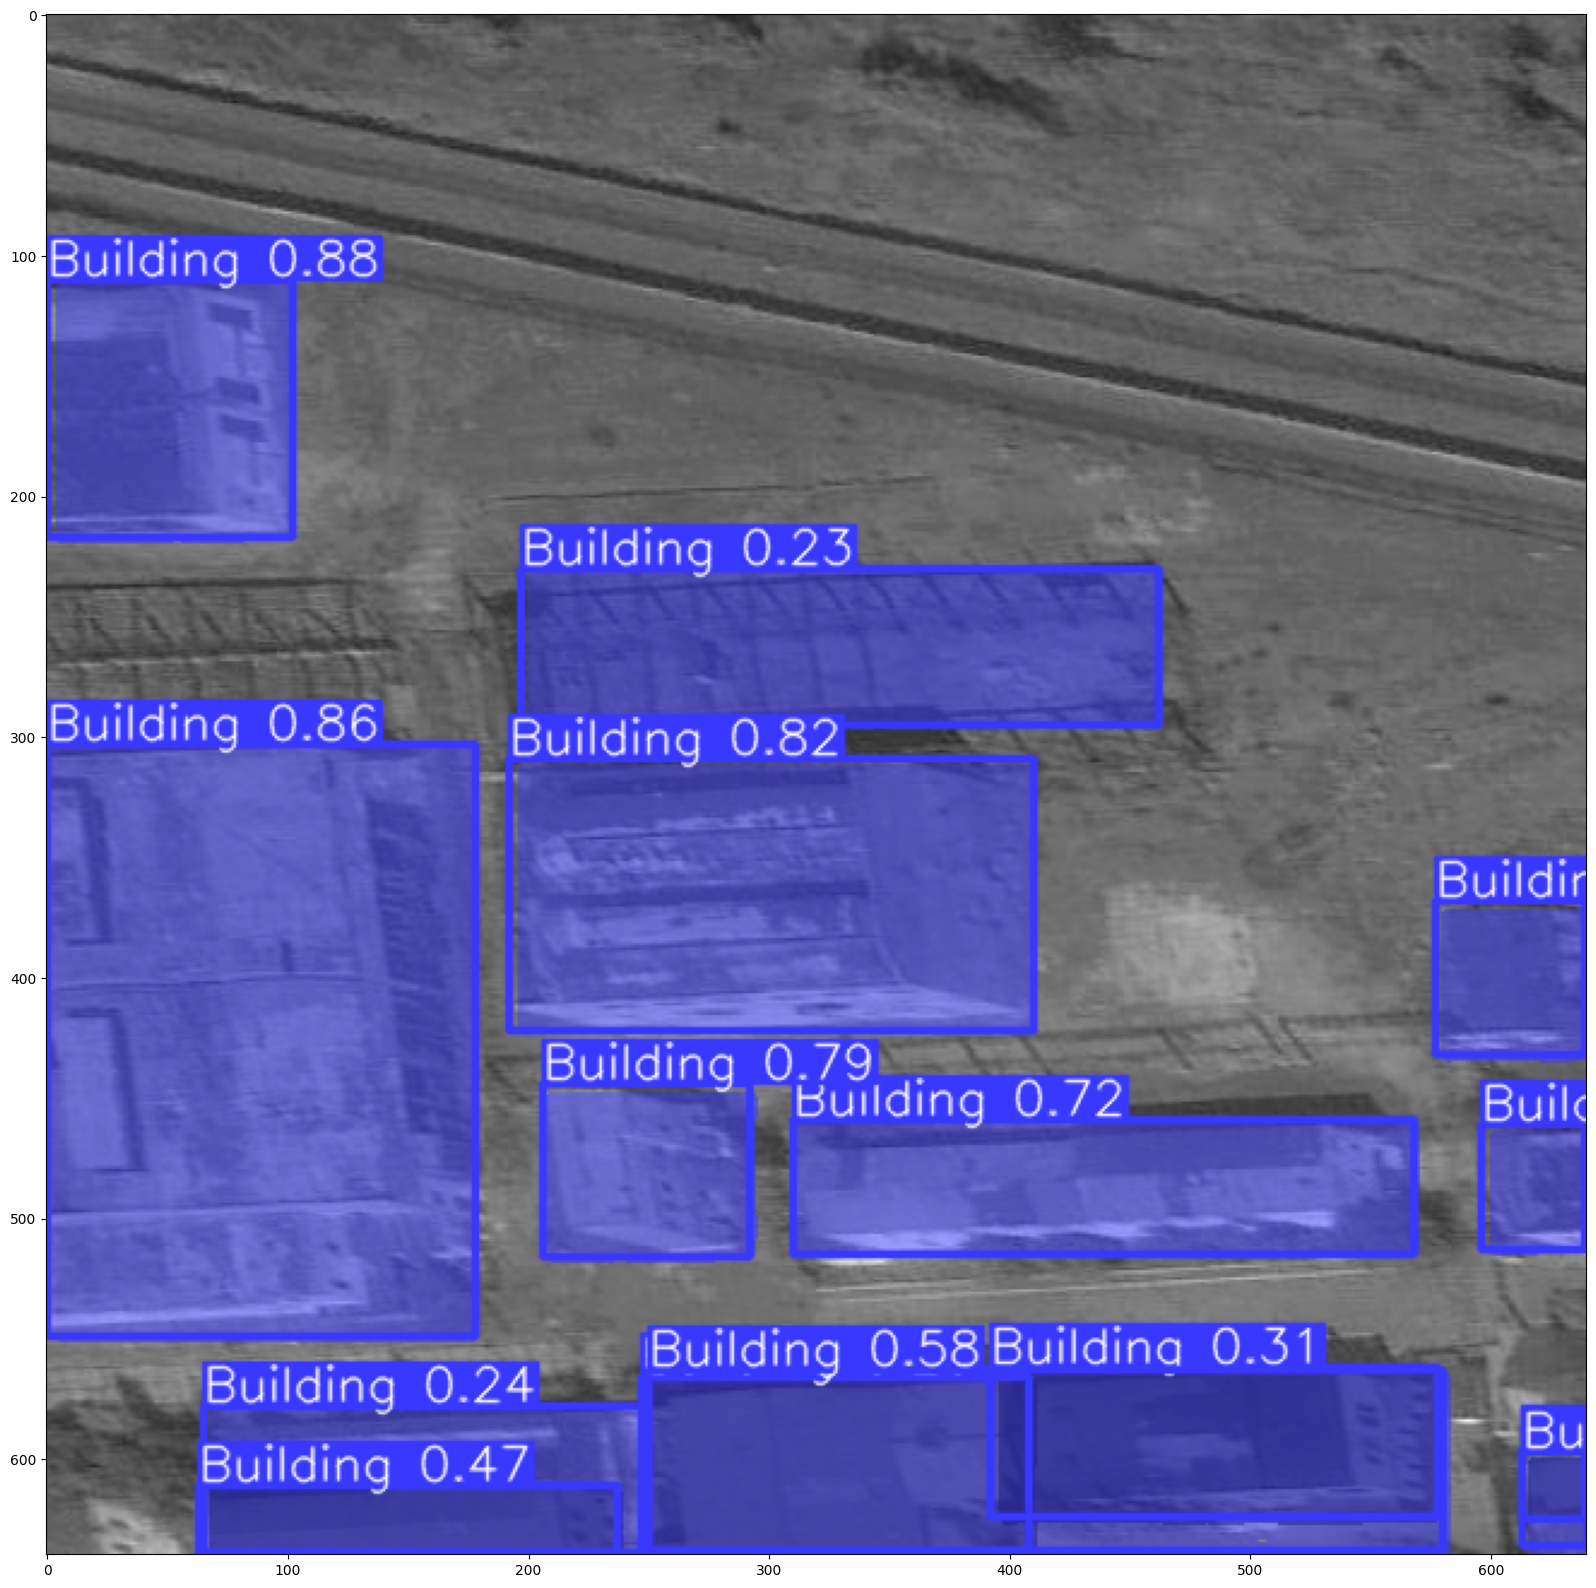

In [36]:
test_image_1_array = results_test_image_1[0].plot()
plt.figure(figsize=(20, 20))
plt.imshow(test_image_1_array)

In [38]:
#Extracting bounding boxes and segmented masks from test image prediction
new_test_result_1 = results_test_image_1[0]
new_test_result_1

ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: ultralytics.engine.results.Masks object
names: {0: 'Building'}
orig_img: array([[[ 96,  96,  96],
        [ 96,  96,  96],
        [ 97,  97,  97],
        ...,
        [ 95,  95,  95],
        [101, 101, 101],
        [106, 106, 106]],

       [[ 96,  96,  96],
        [ 97,  97,  97],
        [ 97,  97,  97],
        ...,
        [ 89,  89,  89],
        [ 93,  93,  93],
        [ 96,  96,  96]],

       [[100, 100, 100],
        [100, 100, 100],
        [100, 100, 100],
        ...,
        [ 88,  88,  88],
        [ 89,  89,  89],
        [ 91,  91,  91]],

       ...,

       [[107, 107, 107],
        [107, 107, 107],
        [107, 107, 107],
        ...,
        [101, 101, 101],
        [101, 101, 101],
        [103, 103, 103]],

       [[103, 103, 103],
        [104, 104, 104],
        [104, 104, 104],
        ...,
        [104, 104, 104],
        [10

In [39]:
# These are all the poylgons for this mask
new_test_result_1.masks.xyn

[array([[  0.0078125,       0.175],
        [    0.00625,     0.17656],
        [    0.00625,     0.34062],
        [  0.0078125,     0.34219],
        [    0.08125,     0.34219],
        [   0.082813,     0.34062],
        [   0.085938,     0.34062],
        [     0.0875,     0.34219],
        [    0.12656,     0.34219],
        [    0.12812,     0.34062],
        [    0.15625,     0.34062],
        [    0.15937,      0.3375],
        [    0.15937,     0.33437],
        [    0.16094,     0.33281],
        [    0.16094,     0.17656],
        [    0.15937,       0.175]], dtype=float32),
 array([[    0.00625,       0.475],
        [  0.0046875,     0.47656],
        [          0,     0.47656],
        [          0,     0.85781],
        [   0.003125,     0.85781],
        [  0.0046875,     0.85938],
        [    0.00625,     0.85938],
        [  0.0078125,     0.86094],
        [    0.27656,     0.86094],
        [    0.27969,     0.85781],
        [    0.27969,     0.47813],
        [  

In [40]:
# This shape shoes you the objects detected
extracted_masks_1 = new_test_result_1.masks.data
extracted_masks_1.shape

torch.Size([15, 640, 640])

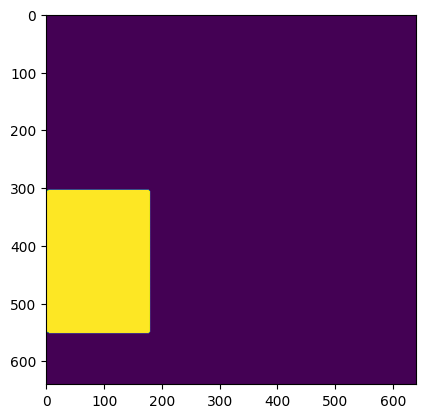

In [41]:
masks_array_1 = extracted_masks_1.cpu().numpy()
plt.imshow(masks_array_1[1])

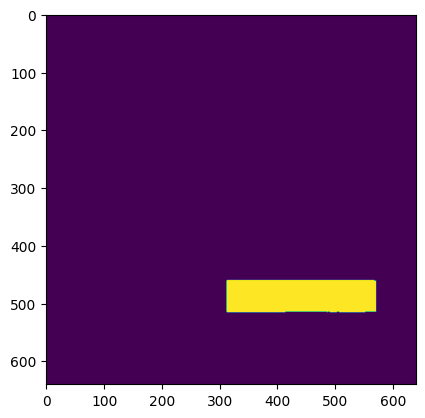

In [42]:
plt.imshow(masks_array_1[5])

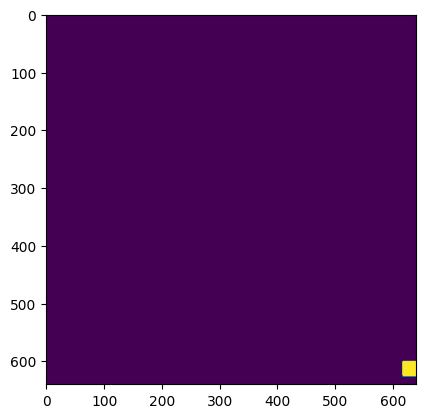

In [44]:
plt.imshow(masks_array_1[10])

In [68]:
# Run batched inference on a list of images
# Define path to directory containing images
source = '/content/test_1'

# Run inference on the source
results_1 = trained_model_1(source, stream=True, save=True, project="r/content/data/15_epochs-/results_1", name="inference", exist_ok=True, save_crop=True)

In [69]:
for result in results_1:
    boxes = result.boxes  # Boxes object for bbox outputs
    masks = result.masks  # Masks object for segmentation masks outputs
    keypoints = result.keypoints  # Keypoints object for pose outputs
    probs = result.probs  # Probs object for classification outputs


image 1/653 /content/test_1/Donetsk_2022_R1C8_10000_10500_11000_11500_jpg.rf.5afc2358a3edee0b3d6f6f96afa87aa2.jpg: 640x640 5 Buildings, 13.1ms
image 2/653 /content/test_1/Donetsk_2022_R1C8_10500_11000_10500_11000_jpg.rf.946d29894c1622786f327ebcf7df0dad.jpg: 640x640 5 Buildings, 12.1ms
image 3/653 /content/test_1/Donetsk_2022_R1C8_9500_10000_12000_12500_jpg.rf.53cb6d2a168858f2717f94408eafffd5.jpg: 640x640 7 Buildings, 11.0ms
image 4/653 /content/test_1/Donetsk_2022_R1C9_2000_2500_4500_5000_jpg.rf.c6fc5c21eb5a1742795a4cde7995b777.jpg: 640x640 4 Buildings, 11.3ms
image 5/653 /content/test_1/Donetsk_2022_R1C9_4000_4500_8500_9000_jpg.rf.4f83d015dec7f5e8a9d88f6b6d172f6a.jpg: 640x640 5 Buildings, 10.6ms
image 6/653 /content/test_1/Donetsk_2022_R1C9_5000_5500_14500_15000_jpg.rf.7e48a211ddb61926eb13065d55813417.jpg: 640x640 5 Buildings, 11.1ms
image 7/653 /content/test_1/Donetsk_2022_R1C9_5500_6000_14500_15000_jpg.rf.edccbff2e6e1eb42e4922b43fe2bd72a.jpg: 640x640 4 Buildings, 10.8ms
image 8/653

In [70]:
source_2 = '/content/test_2'

# Run inference on the source
results_2 = trained_model_1(source_2, stream=True, save=True, project="r/content/data/15_epochs-/results_2", name="inference", exist_ok=True, save_crop=True)

for result in results_2:
    boxes = result.boxes  # Boxes object for bbox outputs
    masks = result.masks  # Masks object for segmentation masks outputs
    keypoints = result.keypoints  # Keypoints object for pose outputs
    probs = result.probs  # Probs object for classification outputs


image 1/72 /content/test_2/tyrol-w20-89-_png_jpg.rf.b3573d8a701ca86e57bdc98f48c888a1.jpg: 640x640 (no detections), 12.1ms
image 2/72 /content/test_2/tyrol-w21-21-_png_jpg.rf.fc9933b850355ae07a3aefa5fadfdcb7.jpg: 640x640 14 Buildings, 10.4ms
image 3/72 /content/test_2/tyrol-w21-35-_png_jpg.rf.63a079bbc40580d0ecc62e23b9502429.jpg: 640x640 17 Buildings, 11.4ms
image 4/72 /content/test_2/tyrol-w21-45-_png_jpg.rf.f82016eeb010fec302c72168683f3197.jpg: 640x640 25 Buildings, 11.3ms
image 5/72 /content/test_2/tyrol-w21-50-_png_jpg.rf.3abd19f95240192bc954f20994c098f3.jpg: 640x640 15 Buildings, 11.7ms
image 6/72 /content/test_2/tyrol-w22-16-_png_jpg.rf.f6b5d4cc7520fb78895ee1da791fff89.jpg: 640x640 9 Buildings, 11.3ms
image 7/72 /content/test_2/tyrol-w22-17-_png_jpg.rf.e8ed17a637fccfb763283ac8ddad2934.jpg: 640x640 18 Buildings, 11.2ms
image 8/72 /content/test_2/tyrol-w22-18-_png_jpg.rf.eaf9aa95828a8da21f76504fa02b0fb8.jpg: 640x640 17 Buildings, 11.7ms
image 9/72 /content/test_2/tyrol-w22-21-_png_

In [79]:
source_3 = '/content/test_3'

# Run inference on the source
results_3 = trained_model_1(source_3, stream=True, save=True, project="results//content/drive/MyDrive/datasets", name="inference", exist_ok=True, save_crop=True)

for result in results_3:
    boxes = result.boxes  # Boxes object for bbox outputs
    masks = result.masks  # Masks object for segmentation masks outputs
    keypoints = result.keypoints  # Keypoints object for pose outputs
    probs = result.probs  # Probs object for classification outputs


image 1/105 /content/test_3/tyrol-w21-3-_png_jpg.rf.36e2c70c52b5025611ae935aee015e45.jpg: 640x640 (no detections), 18.4ms
image 2/105 /content/test_3/tyrol-w21-32-_png_jpg.rf.101cd924a39b639fd9806ff57a778e2e.jpg: 640x640 6 Buildings, 11.9ms
image 3/105 /content/test_3/tyrol-w21-46-_png_jpg.rf.dbee13aef67bf5ff3be1d2271c8808ab.jpg: 640x640 18 Buildings, 14.6ms
image 4/105 /content/test_3/tyrol-w21-74-_png_jpg.rf.80ffe13161b242b575c2ecd28134c7a3.jpg: 640x640 7 Buildings, 11.8ms
image 5/105 /content/test_3/tyrol-w21-75-_png_jpg.rf.6cd98f28ef536c923729b27659f89785.jpg: 640x640 17 Buildings, 11.7ms
image 6/105 /content/test_3/tyrol-w21-93-_png_jpg.rf.4c3cadaccc9c0557e143678f811b9a31.jpg: 640x640 21 Buildings, 11.9ms
image 7/105 /content/test_3/tyrol-w22-22-_png_jpg.rf.24cc8a89244bba2e09150973d849dfae.jpg: 640x640 34 Buildings, 12.4ms
image 8/105 /content/test_3/tyrol-w22-25-_png_jpg.rf.a625643595e11ac5f56187d3cc946bf0.jpg: 640x640 6 Buildings, 11.7ms
image 9/105 /content/test_3/tyrol-w22-29

In [50]:
# Exporting model as onnx model for later use
model.export(format = "onnx", imgsz=[640,640])

Ultralytics YOLOv8.0.206 🚀 Python-3.10.12 torch-2.1.0+cu118 CPU (Intel Xeon 2.00GHz)
YOLOv8n-seg summary (fused): 195 layers, 3258259 parameters, 0 gradients, 12.0 GFLOPs

PyTorch: starting from '/content/data/15_epochs-/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) ((1, 37, 8400), (1, 32, 160, 160)) (6.5 MB)
requirements: Ultralytics requirement ['onnx>=1.12.0'] not found, attempting AutoUpdate...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 121.8 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 7.2s, installed 1 package: ['onnx>=1.12.0']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.15.0 opset 17...
ONNX: export success ✅ 8.1s, saved as '/content/data/15_epochs-/weights/best.onnx' (12.6 MB)

Export complete (9.7s)
Results saved to /content/data/15_epochs-/weights
Predict:         yolo predict task=segment model=/content/data/15_epochs-/weights/best.onnx imgsz=640  
Valid

'/content/data/15_epochs-/weights/best.onnx'